## Predicting Developer Salaries

### Project Background
Africa’s Tech sector has become one of the fastest growing tech ecosystems in the world with tech being one of the fastest growing sectors in Africa. This has led to a rise in demand for jobs in the industry.
However, unlike other parts of the world, information on remuneration in these jobs remains hard to come by. Existing resources such as glassdoor and brighter monday have limited information on salaries in Africa.
Over the past few years, it has been observed that foreign companies enter the African Market, offering more competitive salaries compared to local companies resulting in mass movement of experienced developers into these new roles.
This project seeks to solve this problem by developing a platform that can predict developer salaries based on their personal information, and also, providing comparison between different incomes in different regions for similar roles.


### Stakeholders:
- Jobseekers
- Employers
- Recruitment agencies

### Business Understanding
Salary negotiation can be a critical stage in the job search process, and job seekers often encounter various challenges during this phase like lack of information on salary trends. This means that a jobseeker might spend valuable time researching industry salary trends. Some might not be so lucky as the information might be non existent.

As the Tech labour market becomes more competitive, offering the right salary for new and current employees is crucial for employers as it means keeping or losing a valued resource. Thus it is imperative for them to offer fair and competitive compensation that is benchmarked to their industry

Our project looks at coming up with salary prediction model to help both jobseekers and employers with the above challenges. We will focus on the tech industry (developers) and use data from stackoverflow's annual developer survey.

### Problem statement
Our solution to the problem of inadequate salary data for both employees and employers is to develop a salary prediction model, to estimate salaries based on relevant job specifications. The model will assist in making informed decisions related to compensation and provide valuable insights for both job seekers and employers.

The salary prediction model will enable job seekers to have a better understanding of the salary expectations associated with their qualifications and experience.

Employers can use the model to make informed decisions regarding fair compensation packages for new hires or salary adjustments for existing employees.

Job sites like linkedin, glassdoor, brigther monday can use this model for jobs displayed on the sites by quoting the estimated salaries


### Objectives

- The main objective of this project is to come up with a salary rediction model that will:
- Enable Jobseekers to ask for competitive salaries during contract negotiations.
- Assist employers in offering fair compensation to their employees.
- Assist Recruitment agencies offer accurate salary estimates to their clients.

These objectives will be achieved through the following specific objectives:
- To select the most important features in the dataset to be used in Salary prediction.
- To describe how features such as Proffessional experience and Education level affect Annual compensation.
- To build multiple regression models and identify the most suitable model to be used in the prediction.
- To deploy the model using streamlit as an online dashboard.

### Success Metrics

The metrics to be used to measure the success of the model are:
- Mean Absolute Error
- Root Mean Square Error
- Rsquared

An Rsquared  value of 75% or more will be considered a success, i.e the model explains more than 75% of the  variance in pay of the developers.

### Data Understanding
The data comes from [stackoverflow annual developer survey](https://insights.stackoverflow.com/survey/) for 2022. Each row shows the responses given by a developer. It has 73268 rows and  79 columns. The data has missing values, but no duplicate rows.

The target variable ConvertedCompYearly shows the annual salary for each developer.
The data contains responses from 180 countries.
Opportunities to clean the data and use PCA to reduce the number of columns



In [86]:
# import all required modules
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')
import category_encoders as ce
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [87]:
#load dataset
original_df = pd.read_csv('survey_results_public.csv')
original_df.head(2)
df = original_df.copy()

#### Class for Understanding Dataset
Below we create a class to:
- give data dimensions
- display column info
- give descriptive stats on numerical columns
- check data types, duplicates & missing values

From the below outputs of the class:
- The Dataset has no duplicates
- Data has 6 numeric columns and 73 categorical columns
- 77 columns have missing values, ranging from 2% (`country` column) to 100% (`VCHostingProfessional use` & `VCHostingPersonal use` columns). We will deal with missing values in the data cleaning section

In [88]:
# class to describe dataset

class Describer:

    # initialize object
    def __init__(self, df):
        self.df = df

    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types
    def data_type(self):
        """A simple function to check the data types on th datasets """

        print("Data has",len( df.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(df.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', df.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""

        for i in df.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values
    def missing_values(self):

        """ Function for checking null values in percentage in relation to length of the dataset """

        if df.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = df.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]

# creating an instance of the class describer
describe_df = Describer(df)

# lets view the shape of the data
describe_df.shape()

# lets check for duplicates
describe_df.check_duplicates()

# lets describe data types
describe_df.data_type()

# lets view the info of the data
describe_df.data_info()

# lets describe numerical cols
describe_df.data_describe()

# lets get missing values
describe_df.missing_values()




The DataFrame has:
	* 73268 rows
	* 79 columns 



The Dataset has No Duplicates
Data has 6 Numeric columns
and 73 Categorical columns
*******************
*******************
Numerical Columns: Index(['ResponseId', 'CompTotal', 'VCHostingPersonal use',
       'VCHostingProfessional use', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')
Categorical Coulumns: Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollab

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
LearnCodeCoursesCert,43879,0.598884
OfficeStackAsyncWantToWorkWith,41196,0.562265
Frequency_3,38753,0.528921
...,...,...
EdLevel,1697,0.023162
SOAccount,1696,0.023148
LearnCode,1688,0.023039
Employment,1559,0.021278


### Data Cleaning
The data cleaning process will entail the following:
- Renaming clumsily worded columns for easier understanding
- Dealing with missing data from the 77 columns
    - Drop columns with 100% missing data

#### Renaming Columns
When going through the data, we noticed some clumsily worded columns. To make the data easier to understand, we came up with new names. Below we code a function that will take in the new and old names as key-value pairs, then use these to rename the columns in the dataframe.

We have run the function below and confirmed renaming of a few columns e.g. columns 3 to 5

In [89]:

def rename(data):

    # import text doc with old and new col names
    cols = pd.read_csv(r'cols.txt', sep='\t')

    # create a dictionary with the cols df
    cols_dict = dict(zip(cols['Old'], cols['New']))

    # rename cols in the dataframe
    df = data.rename(columns = cols_dict)

    return df

df = rename(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


### Cleaning Missing Data
`VCHostingProfessional use` and `VCHostingPersonal use` columns have no data, hence have 100% missing values. We drop these 2 columns for this reason

In [90]:
describe_df.missing_values()

,Missing Values,Percentage %
VCHostingProfessional use,73268,1.000000
VCHostingPersonal use,73268,1.000000
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


In [91]:
# function to drop 'VCHostingProfessional use' &  'VCHostingPersonal use' cols
def dropping_columns(data, columns):

    """A simple function to drop columns with missing values"""

    drop_column = data.drop(columns=columns, axis=1)

    return drop_column

columns_to_drop = ['VCHostingProfessional use', 'VCHostingPersonal use']

df = dropping_columns(df, columns_to_drop)

describe_df.missing_values()


,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
Knowledge_Silos,38753,0.528921
ProfessionalTech,38362,0.523585
Siloed_Teams,38295,0.522670
...,...,...
Education_Level,1697,0.023162
SOAccount_Ownership,1696,0.023148
Learn_Code_Method,1688,0.023039
Employment_Status,1559,0.021278


### Columns With Legitimately Missing Values
The column `Participation_PDS` allowed a developer to choose wether or not they would answer the subsequent 20 questions. This means that the missing values for these will be missing because they should.

In `Participation_PDS` we will replace NA with No, then in the subsequent PDS questions, replace NA with Not Answered

In [92]:
# function to replace NA in Participation_PDS with No
def fill_pds(data):
    data['Participation_PDS'] = data.Participation_PDS.fillna('No')
    return data

df = fill_pds(df)
df.Participation_PDS.unique()

array(['No', 'Yes'], dtype=object)

In [93]:
# function to clean cols 'Contributor_or_Manager':'Learning_Support'
def replace_na(data):
    for index, row in data.iterrows():
        if row['Participation_PDS'] == 'No':
            data.loc[index, 'Contributor_or_Manager':'Learning_Support'] = 'Not Answered'
    return data

df = replace_na(df)
df.head()

,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeSearching_Answers,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Easy,NaN


In [94]:
describe_df.missing_values()

,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
...,...,...
Is_Involved_Onboarding,1381,0.018849
TimeAnswering,1178,0.016078
TimeSearching_Answers,1002,0.013676
Contributor_or_Manager,917,0.012516


After cleaning the legitimate missing columns above, we expected subsequent values to contain no missing data. However, on inspecting some 'Yes' values in  `Participation_PDS` we realised they also had some missing values in the subsequent columns. Below we clean these missing values by assigning them to 'Not Answered'

In [95]:
# function to replace yes in Participation_PDS with missing vals in subsequent columns
    # Define the range of columns
columns_range = ['Contributor_or_Manager', 'WorkExp', 'Extroverted', 'Siloed_Teams',
       'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource',
       'Recurring_Responses', 'Workflow_Interruptions',
       'External_Team_Assistance', 'External_Team_Interaction',
       'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
       'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding',
       'Employer_Learning_Resources', 'Learning_Support']

def replace_yesna(data, columns_range, valuefill):
    # Replace 'NA' with 'not answered' in the specified range of columns
    data[columns_range] = data[columns_range].fillna(valuefill)
    return data

df = replace_yesna(df, columns_range,'Not Answered')

df.TimeSearching_Answers.value_counts()


Not Answered                  37070
30-60 minutes a day           13652
15-30 minutes a day           10122
60-120 minutes a day           6371
Less than 15 minutes a day     3528
Over 120 minutes a day         2525
Name: TimeSearching_Answers, dtype: int64

After cleaning these columns, we now have 55 columns with missing values

In [96]:
len(describe_df.missing_values())

55

To replace the missing values of `SurveyLength` and `SurveyEase`, we reviewed the most common values in both columns. In the former, 'Appropriate in length' is 76% while in the latter, 'Easy' is 67%. Below we use these 2 values to fill missing values for the 2 columns

In [97]:
# for
print(df.SurveyLength.value_counts(normalize=True))
print(df.SurveyEase.value_counts(normalize=True))

Appropriate in length    0.764905
Too long                 0.205709
Too short                0.029385
Name: SurveyLength, dtype: float64
Easy                          0.679157
Neither easy nor difficult    0.306731
Difficult                     0.014112
Name: SurveyEase, dtype: float64


In [98]:
def len_eas(data):
    data.SurveyLength.fillna('Appropriate in length', inplace=True)
    data.SurveyEase.fillna('Easy', inplace=True)

    return data

df = len_eas(df)

print(df.SurveyLength.isna().sum())
print(df.SurveyEase.isna().sum())

0
0


The `Annual_Salary` column is our target variable. It has 47% of its values missing. **to be continued**

In [99]:
print(df['Annual_Salary'].isna().sum())
print(df['Total_Salary'].isna().sum())

35197
34846


In [100]:
print(len(describe_df.missing_values()))
describe_df.missing_values()

53


,Missing Values,Percentage %
Code_Certifications,43879,0.598884
Proj_Mgmt_WantToWorkWith,41196,0.562265
MiscTechWantToWorkWith,36458,0.497598
Annual_Salary,35197,0.480387
Total_Salary,34846,0.475596
PlatformWantToWorkWith,32853,0.448395
Salary_Frequency,28843,0.393664
MiscTechHaveWorkedWith,28276,0.385926
WebframeWantToWorkWith,27146,0.370503
Proj_Mgmt_HVWorkedWith,27045,0.369124


Below we select rows with 20% - 70% missing values in all columns. Looking at the sample distribution of missing values, we will drop all rows with more than 50% missing values as they quality of their responses are doubful

In [101]:
# function to calculate 20% - 70% of col missing values
def missing_vals(data):
    # Calculate the percentage of missing values for each row
    missing_percentages = data.isnull().mean(axis=1) * 100

    # Select rows with 20% missing values
    rows_20_percent_missing = data[missing_percentages >= 20]

    # Select rows with 50% missing values
    rows_50_percent_missing = data[missing_percentages >= 50]

    # Select rows with 60% missing values
    rows_60_percent_missing = data[missing_percentages >= 60]

    # Select rows with 70% missing values
    rows_70_percent_missing = data[missing_percentages >= 70]

    out = print("20% missing: ", len(rows_20_percent_missing), "50% missing: ", len(rows_50_percent_missing),
                "60% missing: ", len(rows_60_percent_missing), "70% missing: ", len(rows_70_percent_missing))
    return out

missing_vals(df)

20% missing:  14802 50% missing:  1557 60% missing:  1510 70% missing:  0


In [102]:
# function to drop rows with more than 50% missing values
def drop_50(data):
    threshold = len(data.columns) * 0.5  # 50% of total columns
    data = data.dropna(thresh=threshold)

    return data

df = drop_50(df)
df.shape

(71711, 77)

In [103]:
cols = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
Annual_Salary
Total_Salary
PlatformWantToWorkWith
Salary_Frequency
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
OrgSize
Currency
Pro_Experience
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
SOA_ParticipationFreq
Outofwork_Coding
Remote_vs_Onsite
DatabaseHaveWorkedWith
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
OpSysProfessional use
MentalHealth
Sexuality
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
Ethnicity
Trans
NEWCollabToolsHaveWorkedWith
Gender
Age
OpSysPersonal use
SOVisitFreq
LanguageHaveWorkedWith
Blockchain_Sentiment
Coding_Experience
New_Stack_Overfl_Sites
VersionControlSystem
Belong_SO_Comm
Education_Level
SOAccount_Ownership
Learn_Code_Method
Employment_Status
"""
# function to split cols variable into a list
def listcols(cols):
    cols_list = cols.split('\n')
    cols_list = [col.strip() for col in cols_list if col.strip()]

    return cols_list

cols_list = listcols(cols)
print(cols_list)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'Annual_Salary', 'Total_Salary', 'PlatformWantToWorkWith', 'Salary_Frequency', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'OrgSize', 'Currency', 'Pro_Experience', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'SOA_ParticipationFreq', 'Outofwork_Coding', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'MentalHealth', 'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity', 'Trans', 'NEWCollabToolsHaveWorkedWith', 'Gender', 'Age', 'OpSysPersonal use', 'SOVisitFreq', 'LanguageHaveWorkedWith', 'Blockchain_Sentiment', 'Coding_Experience', 'New_Stack_Overfl_Sites', 'VersionControlS

We select the columns with missing values, then below we run a profiles report to inspect the properties of each columns, and decide on how to deal with the missing values.

In [104]:
# function to display profile report for cols
# with missing values
def profile_report(data, cols_list):
    missing_cols = data[cols_list]
    profile = ProfileReport(missing_cols, title = "Profiling Report", minimal = True)
    return profile

#profile_report(df, cols_list)

#### Drop `Total_Salary`, `Salary_Frequency` and `Currency` Columns
These columns are used to compute `Annual_Salary` column, which is our target variable. Thus they should not form part of the feature variables

In [105]:
# use our function to drop
columns_to_drop1 = ['Total_Salary', 'Salary_Frequency', 'Currency']
df = dropping_columns(df, columns_to_drop1)
df.shape[1]

74

In [106]:
# confirming cols have been dropped
def confirm(data, columns_to_drop1):
    for i in columns_to_drop1:
        print(i in data.columns)
    return None

confirm(df, columns_to_drop1)

False
False
False


#### Handle Missing Values with None of the Above
The columns below have valid missing values because the response options did not allow the developers specify the responses that did not apply to them. For example in the column `Code_Certifications` asks developers the online resources they used to learn coding. However, it is possible that some people didn't use these resources because they learned coding in the degree courses for example. Since this option misses from the responses, those develpers opted to skip for this reason. The same logic applies to the remaining columns selected below

In [107]:
# create list of columns
cols1 = """Code_Certifications
Proj_Mgmt_WantToWorkWith
MiscTechWantToWorkWith
PlatformWantToWorkWith
MiscTechHaveWorkedWith
WebframeWantToWorkWith
Proj_Mgmt_HVWorkedWith
ToolsTechWantToWorkWith
Proj_Mgmt_SyncWantToWorkWith
PlatformHaveWorkedWith
Learn_Code_Source
PurchaseInfluence
DatabaseWantToWorkWith
WebframeHaveWorkedWith
ToolsTechHaveWorkedWith
Outofwork_Coding
DevType
Proj_Mgmt_SyncHaveWorkedWith
NEWCollabToolsWantToWorkWith
MentalHealth
LanguageWantToWorkWith
Disability
Purchase_Research
VCInteraction
NEWCollabToolsHaveWorkedWith
New_Stack_Overfl_Sites
OrgSize
Remote_vs_Onsite
DatabaseHaveWorkedWith"""

cols_list1 = listcols(cols1)
print(cols_list1)

['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith', 'MiscTechHaveWorkedWith', 'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith', 'PlatformHaveWorkedWith', 'Learn_Code_Source', 'PurchaseInfluence', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DevType', 'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'MentalHealth', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'NEWCollabToolsHaveWorkedWith', 'New_Stack_Overfl_Sites', 'OrgSize', 'Remote_vs_Onsite', 'DatabaseHaveWorkedWith']


In [108]:
# use function to filll in list of columns with None
df = replace_yesna(df, cols_list1,'None of the Above')
df.Code_Certifications.value_counts()

None of the Above                                        42323
Udemy                                                     5643
Other                                                     2593
Coursera;Udemy                                            1893
Udemy;Codecademy                                          1472
                                                         ...  
Coursera;Udemy;Codecademy;Pluralsight;Other;Skillsoft        1
Coursera;Udemy;Pluralsight;edX;Other;Skillsoft               1
Coursera;edX;Skillsoft                                       1
Pluralsight;edX;Udacity;Other                                1
Codecademy;Pluralsight;Other;Skillsoft                       1
Name: Code_Certifications, Length: 207, dtype: int64

#### Missing Values filled With One of the Response Options
For this set of columns, we have identified a criteria to fill in the missing values based on the response distribution. For example:
- demographic variable missing values are filled with preferred not to say option due to sensitivity
- some other variables filled with the most common response option based on domain knowledge e.g operating systems used
- while some filled with 'not sure/can't rememember'- e.g. blockchain sentiments

In [109]:
# Function to rename values in the 'Experience' column
def rename_values(df, column):
    df[column] = df[column].replace({'Less than 1 year': 0.5, 'More than 50 years': 50})
    return df

# Call the function to rename values in the 'Pro_Experience' column
df = rename_values(df, 'Pro_Experience')

# Call the function to rename values in the 'Coding_Experience' column
df = rename_values(df, 'Coding_Experience')


In [110]:
# cols to fill with 'Prefer not to say'
demo = ['Sexuality', 'Ethnicity', 'Trans', 'Gender']

df = replace_yesna(df, demo,'Prefer not to say')

# cols to fill with 'I prefer not to say'
df = replace_yesna(df, 'Employment_Status','I prefer not to say')

# fill Age with '25-34 years old'
df = replace_yesna(df, 'Age','25-34 years old')

# fill 'OpSysPersonal use' & 'OpSysProfessional use' with 'Windows'
ops = ['OpSysPersonal_use', 'OpSysProfessional_use']
df = replace_yesna(df, ops,'Windows')

# fill  SOVisitFreq with 'Daily or almost daily'
df = replace_yesna(df, 'SOVisitFreq','Daily or almost daily')

# fill Blockchain_Sentiment with 'Unsure'
df = replace_yesna(df, 'Blockchain_Sentiment','Unsure')

# fill Coding_Experience, Pro_Experience with median
df['Coding_Experience'].fillna(df['Coding_Experience'].median(), inplace=True)
df['Pro_Experience'].fillna(df['Pro_Experience'].median(), inplace=True)

# fill VersionControlSystem with 'I don't use one'
df = replace_yesna(df, 'VersionControlSystem',"I don't use one")

# fill Belong_SO_Comm with 'Not sure'
df = replace_yesna(df, 'Belong_SO_Comm',"Not sure")

# fill Education_Level with 'Something else'
df = replace_yesna(df, 'Education_Level',"Something else")

# fill SOAccount_Ownership with Not sure/can't remember
df = replace_yesna(df, 'SOAccount_Ownership',"Not sure/can't remember")

# fill Learn_Code_Method with 'I don't use one'
df = replace_yesna(df, 'Learn_Code_Method',"I don't use one")

# fill SOA_ParticipationFreq with 'Less than once per month or monthly'
df = replace_yesna(df, 'SOA_ParticipationFreq',"Less than once per month or monthly")

# fill LanguageHaveWorkedWith with 'Bash/Shell'
df = replace_yesna(df, 'LanguageHaveWorkedWith',"Bash/Shell")


In [111]:
print(len(describe_df.missing_values()))
describe_df.missing_values()

1


,Missing Values,Percentage %
Annual_Salary,33640,0.469105


#### Handling Multiple Response Values
From the profiles analysis, the columns below were discovered to contain multiple and fragmented respones for each row, which masked the true distribution across categories due to unique combination of values contained in each row. To untangle the values and have unique responses, we will select the first mentioned response. Our rationale is that this responses for e.g in `Code_Certifications` represents the online resource that was used most often, was most impactful, or most memorable to the developer. The same arguement holds for the other columns.

In [112]:
# Code to extract first mentions
def extract_first_value_from_columns(df, columns):
    first_values = {}
    for col in columns:
        first_values[col] = df[col].apply(lambda x: x.split(";")[0].strip() if isinstance(x, str) and ";" in x else x)
    return pd.DataFrame(first_values)

# columns to be cleaned
colslist = ['Code_Certifications', 'Proj_Mgmt_WantToWorkWith', 'MiscTechWantToWorkWith', 'PlatformWantToWorkWith',
'WebframeWantToWorkWith', 'Proj_Mgmt_HVWorkedWith', 'ToolsTechWantToWorkWith', 'Proj_Mgmt_SyncWantToWorkWith',
'PlatformHaveWorkedWith', 'Learn_Code_Source', 'DatabaseWantToWorkWith', 'WebframeHaveWorkedWith',
'ToolsTechHaveWorkedWith', 'Outofwork_Coding', 'DatabaseHaveWorkedWith', 'DevType',
'Proj_Mgmt_SyncHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional_use', 'MentalHealth',
'Sexuality', 'LanguageWantToWorkWith', 'Disability', 'Purchase_Research', 'VCInteraction', 'Ethnicity',
'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal_use', 'LanguageHaveWorkedWith', 'New_Stack_Overfl_Sites',
'VersionControlSystem', 'Learn_Code_Method', 'Employment_Status', 'Gender', 'ProfessionalTech']

# data with cols of first mentions
zer = extract_first_value_from_columns(df, colslist)
zer.Code_Certifications.value_counts(normalize=True)

None of the Above    0.590188
Udemy                0.174701
Coursera             0.143088
Other                0.036285
Codecademy           0.026523
Pluralsight          0.019899
edX                  0.005104
Udacity              0.003695
Skillsoft            0.000516
Name: Code_Certifications, dtype: float64

In [113]:
# replace the colslist in df with cleaned data
# from zer dataframe
df[colslist] = zer

# confirm that values display as expected
df.Code_Certifications.value_counts(normalize=True)

None of the Above    0.590188
Udemy                0.174701
Coursera             0.143088
Other                0.036285
Codecademy           0.026523
Pluralsight          0.019899
edX                  0.005104
Udacity              0.003695
Skillsoft            0.000516
Name: Code_Certifications, dtype: float64

#### Cleaning the `Annual_Salary` Column
To clean this column's missing values, we will look at:
- the employment of each respondent. For unemployed and students without salary values, we will replace missing values with 0 as it is unrealistic to impute values for this group
- the salary distribution at a regional level (e.g. salaries in Africa would differ from Europe), then use the appropriate median value


In [114]:
# for those who don't work and have no salary
# fill missing salary with 0
nonwork = ['Student, full-time', 'Student, part-time',
       'Not employed, but looking for work',
 'Not employed, and not looking for work',
       'Retired', 'I prefer not to say']

df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'].isna()), 'Annual_Salary'] = 0
# confirm that the replace has worked
print(df.Annual_Salary.value_counts().head(), '\n')

# confirm that other null values still exist
print('remaining missing values: ', df.Annual_Salary.isna().sum())

0.0         15964
150000.0      393
200000.0      362
120000.0      341
63986.0       304
Name: Annual_Salary, dtype: int64 

remaining missing values:  17676


In [115]:
# countries grouped into continents
continents = {
    'Asia': ['Israel', 'Hong Kong (S.A.R.)', 'India', 'China', 'Singapore', 'Iraq',
             'Philippines', 'Iran, Islamic Republic of...', 'Indonesia', 'Afghanistan',
             'Viet Nam', 'South Korea', 'Taiwan', 'Japan', 'Thailand', 'Bangladesh',
             'Nepal', 'United Arab Emirates', 'Pakistan', 'Sri Lanka', 'Azerbaijan',
             'Uzbekistan', 'Kazakhstan', 'North Korea', 'Timor-Leste', 'Brunei Darussalam',
             'Oman', 'Saudi Arabia', 'Maldives', 'Jordan', 'Bahrain', 'Republic of Korea',
            'Lebanon', 'Malaysia', "Lao People's Democratic Republic", 'Syrian Arab Republic',
            'Qatar', 'Kyrgyzstan', 'Cambodia', 'Yemen', 'Mongolia', 'Tajikistan', 'Myanmar',
            'Kuwait', 'Turkmenistan', 'Palestine', 'Bhutan'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands', 'Papua New Guinea',
                'Palau'],
    'North America': ['Canada', 'United States of America', 'Mexico', 'Dominican Republic',
                     'Costa Rica', 'Nicaragua', 'Belize', 'Guatemala', 'El Salvador',
                     'Jamaica', 'Cuba', 'Panama', 'Bahamas', 'Barbados', 'Antigua and Barbuda',
                      'Haiti', 'Saint Lucia', 'Saint Kitts and Nevis'],
    'Europe': ['Croatia', 'Netherlands', 'Czech Republic', 'Sweden', 'Denmark',
               'Finland', 'United Kingdom of Great Britain and Northern Ireland',
               'Austria', 'France', 'Portugal', 'Belgium', 'Ireland', 'Iceland',
               'Montenegro', 'Germany', 'Belarus', 'Switzerland', 'Poland',
               'Ukraine', 'Russia', 'Serbia', 'Luxembourg', 'Spain', 'Norway',
               'Romania', 'Italy', 'Turkey', 'Greece', 'Hungary', 'Malta',
               'Estonia', 'Slovenia', 'Bosnia and Herzegovina', 'Bulgaria',
               'Georgia', 'Latvia', 'Lithuania', 'Moldova', 'Macedonia (FYROM)', 'Armenia',
               'Monaco', 'Slovakia', 'Cyprus', 'Russian Federation',
              'The former Yugoslav Republic of Macedonia', 'Andorra', 'Nomadic', 'Albania',
              'Republic of Moldova', 'Kosovo', 'Isle of Man', 'San Marino'],
    'Africa': ['Madagascar', 'South Africa', 'Swaziland', 'Mali', 'Egypt', 'Nigeria',
               'Tunisia', 'Cameroon', 'Ethiopia', 'Ghana', 'Rwanda', 'Senegal',
               'Chad', 'Benin', 'Angola', 'Namibia', 'Malawi', 'Sierra Leone',
               'Zimbabwe', 'Mauritius', 'Morocco', 'Kenya', 'Botswana', 'Liberia', 'Lesotho',
               'Guinea', 'Gabon', 'Seychelles', 'Algeria', 'Zambia', 'Uganda',
              'United Republic of Tanzania', 'Niger', 'Cape Verde', 'Libyan Arab Jamahiriya',
              'Togo', 'Sudan', 'Democratic Republic of the Congo', "Côte d'Ivoire",
              'Congo, Republic of the...', 'Somalia', 'Mozambique', 'Mauritania',
              'Burkina Faso', 'Gambia', 'Djibouti'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru',
                      'Venezuela, Bolivarian Republic of...', 'Bolivia', 'Paraguay',
                      'Ecuador', 'Uruguay', 'Honduras', 'Trinidad and Tobago', 'Suriname',
                     'Guyana']
}

In [116]:
# Create the 'continents' column by mapping the 'countries' column to the continents dictionary
df['continents'] = df['Country'].map({country: continent for continent, countries in continents.items()
                                        for country in countries})

In [117]:
# get median salary for each continent
salo = df[df.Annual_Salary > 0].groupby('continents')['Annual_Salary'].median()
salo

continents
Africa            18126.0
Asia              23215.0
Europe            59720.0
North America    132000.0
Oceania           92002.0
South America     27008.5
Name: Annual_Salary, dtype: float64

In [118]:
continent_mapping = {
    'Africa': 18126.0,
    'Asia': 23215.0,
    'Europe': 59720.0,
    'North America': 132000.0,
    'Oceania': 92002.0,
    'South America': 27008.5}

df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

df.Annual_Salary.isna().sum()

0

In [119]:
# preview salary columnn after handling missing values
df[['continents', 'Country', 'Annual_Salary']].head()

,continents,Country,Annual_Salary
1,North America,Canada,132000.0
2,Europe,United Kingdom of Great Britain and Northern I...,40205.0
3,Asia,Israel,215232.0
4,North America,United States of America,132000.0
5,Europe,Germany,0.0


In [120]:
# confirm no more missing values
describe_df.missing_values()

There Are No Missing Values


#### Handling Nonsensical Values of Annual_Salary
On further investigation of target column, we realise that some respondents entered nonsensical values like USD 1 as their Annual_Salary. These need to be dealt with.

We also realise theat the target variable is binomially distributed. Below we come up with afew categories that will help us to bin the salary values to specific categories

In [121]:
# inspect salary values between USD 1 and USD 4999
nonsense_salary = df[(df['Annual_Salary'] != 0) & (df['Annual_Salary'] <= 5000)][['Annual_Salary', 'Employment_Status', 'Country', 'Pro_Experience', 'continents']].sort_values(
    by='Annual_Salary')
nonsense_salary.head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


In [122]:
df.Employment_Status.value_counts()

Employed, full-time                                     49180
Student, full-time                                       9776
Independent contractor, freelancer, or self-employed     5374
Student, part-time                                       2395
Not employed, but looking for work                       2148
Employed, part-time                                      1142
Not employed, and not looking for work                    730
I prefer not to say                                       661
Retired                                                   305
Name: Employment_Status, dtype: int64

In [123]:
# replace nonsense salary for students, retired, no work
df.loc[(df['Employment_Status'].isin(nonwork)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = 0

In [124]:
# inspect salary values between USD 1 and USD 4999
nonsense_salary.head(400)

,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


In [125]:
work = ['Employed, full-time', 'Independent contractor, freelancer, or self-employed', 'Employed, part-time']

#replace workers with nonsense salary with null
df.loc[(df['Employment_Status'].isin(work)) & (df['Annual_Salary'] != 0)
       & (df['Annual_Salary'] <= 5000), 'Annual_Salary'] = np.nan

In [126]:
# replace nonsense salary for workers
df['Annual_Salary'] = df.groupby('continents')['Annual_Salary'].apply(lambda x: x.fillna(continent_mapping[x.name]))

In [127]:
# confirm no missing values
print(describe_df.missing_values())

# confirm nonsense df returns empty df
nonsense_salary.head(400)

There Are No Missing Values
None


,Annual_Salary,Employment_Status,Country,Pro_Experience,continents
39915,1.0,"Employed, full-time",India,11,Asia
65742,1.0,"Employed, full-time",India,2,Asia
19912,1.0,I prefer not to say,Belgium,50,Europe
64366,1.0,"Employed, full-time",United States of America,0.5,North America
52005,1.0,"Employed, full-time",Viet Nam,5,Asia
...,...,...,...,...,...
38692,1443.0,"Independent contractor, freelancer, or self-em...",Nigeria,8,Africa
32130,1452.0,"Employed, full-time",Nepal,2,Asia
60714,1452.0,"Employed, full-time",Argentina,19,South America
62312,1452.0,"Employed, full-time",Nepal,1,Asia


# Outliers
We have 1 numerical column Annual Salary. Below codes are checking for outliers
* We have  455 outliers , the lowest Outlier in salary is : 1828416.0, the highest Outlier in salary is  : 50000000.0, we also have 0 salary values which are the highest in count.
* Considering this is real world data we have log transformed the values and for the 0 values we have added a constant of 0.00001 to handle 0 values

In [128]:
df.Annual_Salary.value_counts()

0.0         15969
59720.0      7542
23215.0      5769
132000.0     3461
27008.5      1007
            ...  
862044.0        1
149982.0        1
89500.0         1
91380.0         1
9684.0          1
Name: Annual_Salary, Length: 7421, dtype: int64

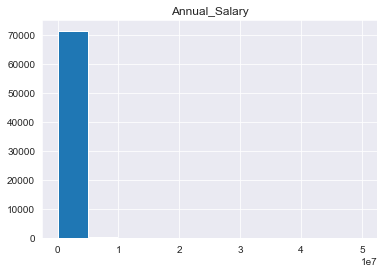

In [129]:
#Annual salary distribution
df.hist('Annual_Salary')
plt.show()

Below we are trying to see who the majority of 0 are

In [130]:
filtered_data = df[df['Annual_Salary'] == 0]
print(filtered_data.shape[0])
filtered_data.head(3)

15969


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
5,6,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media,None of the Above,None of the Above,15,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Europe
6,7,I code primarily as a hobby,"Student, part-time",None of the Above,None of the Above,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Stack Overflow,None of the Above,3,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia
7,8,I am a developer by profession,"Not employed, but looking for work",None of the Above,None of the Above,Some college/university study without earning ...,Online Courses or Certification,None of the Above,Coursera,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Easy,0.0,Asia


In [131]:
avedf = df[(df["Employment_Status"] == "Student, full-time") | (df["Employment_Status"] == "Student, part-time") &
           (df["Annual_Salary"]!= 0.0)]
avedf.Annual_Salary.value_counts()

0.0    9776
Name: Annual_Salary, dtype: int64

In [132]:
filtered_data.groupby('continents').Employment_Status.value_counts()

continents     Employment_Status                     
Africa         Student, full-time                         546
               Not employed, but looking for work         303
               Student, part-time                         148
               Not employed, and not looking for work      32
               I prefer not to say                         26
               Retired                                      2
Asia           Student, full-time                        2586
               Student, part-time                         693
               Not employed, but looking for work         686
               I prefer not to say                        190
               Not employed, and not looking for work     169
               Retired                                     20
Europe         Student, full-time                        4312
               Student, part-time                        1079
               Not employed, but looking for work         593
               N

In [133]:
filtered_data.continents.value_counts()

Europe           6624
Asia             4344
North America    2894
Africa           1057
South America     657
Oceania           393
Name: continents, dtype: int64

In [134]:
df.continents.value_counts()

Europe           31838
North America    16976
Asia             14577
South America     3755
Africa            2657
Oceania           1908
Name: continents, dtype: int64

In [135]:
#create a function to check for Outliers
def check_outliers(data):
    """A function to check for outliers in the numeric columns using Z-Score"""
    series_num = data["Annual_Salary"]
    mean = np.mean(series_num)
    std = np.std(series_num)
    threshold = 3
    outliers = data[np.abs((series_num - mean) / std) > threshold]
    return outliers

outliers = check_outliers(df)

print("The Number of Outliers in the 'Annual_Salary' Column:", len(outliers))
print("Outliers:")
outliers.head(2)

The Number of Outliers in the 'Annual_Salary' Column: 454
Outliers:


,ResponseId,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
117,118,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media,None of the Above,None of the Above,32,...,15-30 minutes a day,Very short,DevOps function,Yes,No,Yes,Appropriate in length,Easy,6000000.0,North America
201,202,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation,Coursera,9,...,Less than 15 minutes a day,Somewhat long,Innersource initiative,Yes,Yes,Yes,Appropriate in length,Neither easy nor difficult,44790396.0,Europe


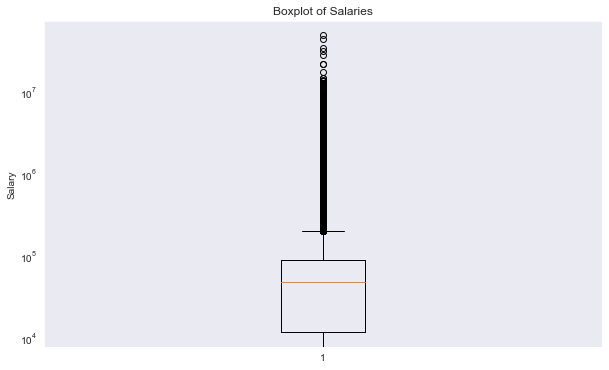

In [136]:
#boxplot to check outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Annual_Salary'])
plt.ylabel('Salary')
plt.yscale('log')
plt.title('Boxplot of Salaries')
plt.show()

In [137]:
#summary of above
print("We have ", len(outliers))
print("The lowest Outlier in salary is :", outliers.Annual_Salary.min())
print("The highest Outlier in salary is  :", outliers.Annual_Salary.max())

We have  454
The lowest Outlier in salary is : 1842804.0
The highest Outlier in salary is  : 50000000.0


### Exploratory Data Analysis

We will explore a few varibales below to help us better understand our data:
- **Developer demographics** : continent, years of experience - work, age, gender, coding, education level, , where learned coding, remote vs onsite
- **Developer tools**: Language worked with, database worked with, cloud platforms worked with, version control, operating system
- **Annual_Salary** - histogram, boxplot. salary by continent, by educational level, years of experience

#### Developer Distribution by Continent
Most of the data was gathered from developers in Europe, North America and Asia.

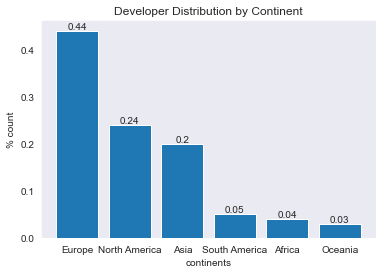

In [138]:
# plt developer distribution by continent
con = round(df.continents.value_counts(normalize=True), 2)
plt.bar(con.index, con.values)
plt.title('Developer Distribution by Continent')
for i, v in enumerate(con.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('continents')
plt.ylabel('% count');


Text(0, 0.5, '% Count')

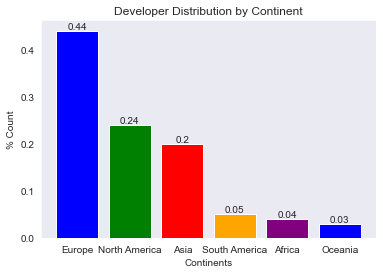

In [139]:
# plt developer distribution by continent
con = round(df.continents.value_counts(normalize=True), 2)
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add a list of colors for the bars
plt.bar(con.index, con.values, color=colors)  # Assign the colors to the bars
plt.title('Developer Distribution by Continent')
for i, v in enumerate(con.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Continents')
plt.ylabel('% Count')


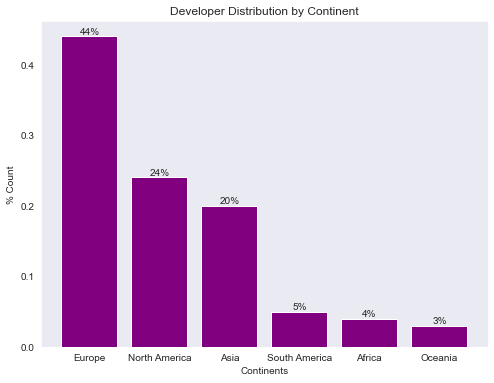

In [140]:

# plt developer distribution by continent
con = round(df.continents.value_counts(normalize=True), 2)
colors = ['purple', 'purple', 'purple', 'purple', 'purple']  # Add a list of colors for the bars

# Set the figure size
plt.figure(figsize=(8, 6))

plt.bar(con.index, con.values, color=colors)  # Assign the colors to the bars
plt.title('Developer Distribution by Continent')

for i, v in enumerate(con.values):
    percent = int(v * 100)
    plt.text(i, v, f'{percent}%', ha='center', va='bottom')  # Convert label to percentage format

plt.xlabel('Continents')
plt.ylabel('% Count')

plt.show()


#### Years of Experience : Professionnal & Coding

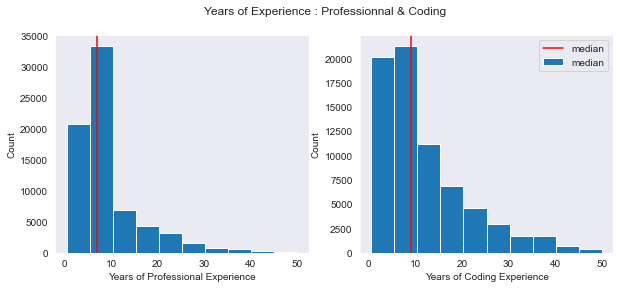

In [141]:
# convert cols from 'object' to 'float' type
df['Pro_Experience'] = df.Pro_Experience.astype('float')
df['Coding_Experience'] = df.Coding_Experience.astype('float')

fig, axes = plt.subplots(ncols=2, figsize=(10,4))

fig.suptitle('Years of Experience : Professionnal & Coding')
axes[0].hist(df.Pro_Experience)
axes[0].axvline(df.Pro_Experience.median(), c='r')
axes[0].set_xlabel('Years of Professional Experience')
axes[0].set_ylabel('Count')
axes[1].hist(df.Coding_Experience)
axes[1].axvline(df.Coding_Experience.median(), c='r')
axes[1].set_xlabel('Years of Coding Experience')
axes[1].set_ylabel('Count')

plt.legend(['median', 'median']);

#### Age and Gender Distribution

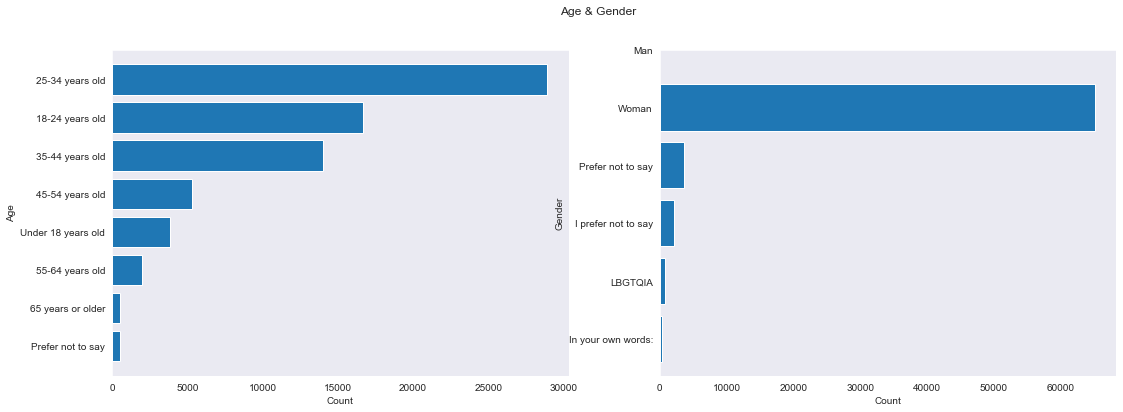

In [142]:
genl = ['In your own words:',
       'LBGTQIA',
       'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

#
agedf = df.Age.value_counts().sort_values(ascending=True)
genddf = df.Gender.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(18,6))

fig.suptitle('Age & Gender')
axes[0].barh(agedf.index, agedf.values)
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Count')
axes[1].barh(genddf.index, genddf.values)
axes[1].set_ylabel('Gender')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(genl)))
axes[1].set_yticklabels(genl);


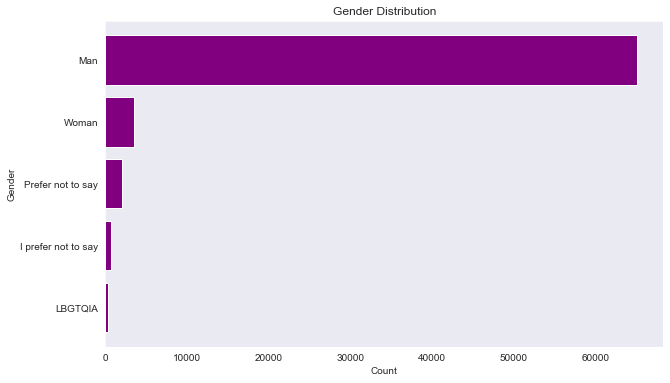

In [143]:
genddf = df.Gender.value_counts().sort_values(ascending=True)
genl = ['LBGTQIA', 'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(genddf.index, genddf.values, color='purple')  # Set the color of the bars
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.yticks(range(len(genl)), genl)  # Set the custom tick labels

plt.show()

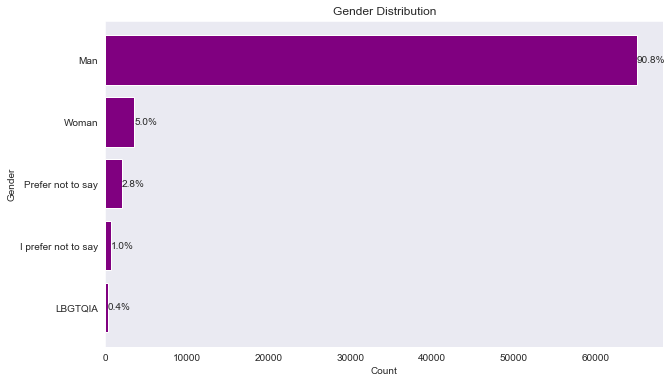

In [144]:
genddf = df.Gender.value_counts().sort_values(ascending=True)
genl = ['LBGTQIA', 'I prefer not to say', 'Prefer not to say', 'Woman', 'Man']

total_count = genddf.sum()  # Calculate the total count for percentage calculation

plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(genddf.index, genddf.values, color='purple')  # Set the color of the bars

plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')

# Calculate and display percentages
for i, v in enumerate(genddf.values):
    percent = round((v / total_count) * 100, 1)
    plt.text(v, i, f'{percent}%', va='center')

plt.yticks(range(len(genl)), genl)  # Set the custom tick labels

plt.show()


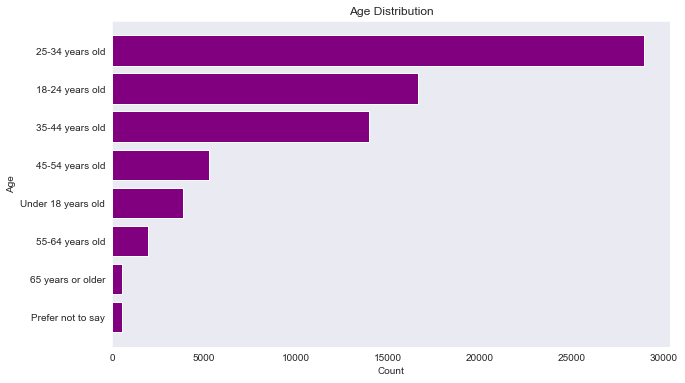

In [145]:
agedf = df.Age.value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(agedf.index, agedf.values, color='purple')  # Set the color of the bars
plt.title('Age Distribution')
plt.xlabel('Count')
plt.ylabel('Age')

plt.show()

#### Source of Coding Skills

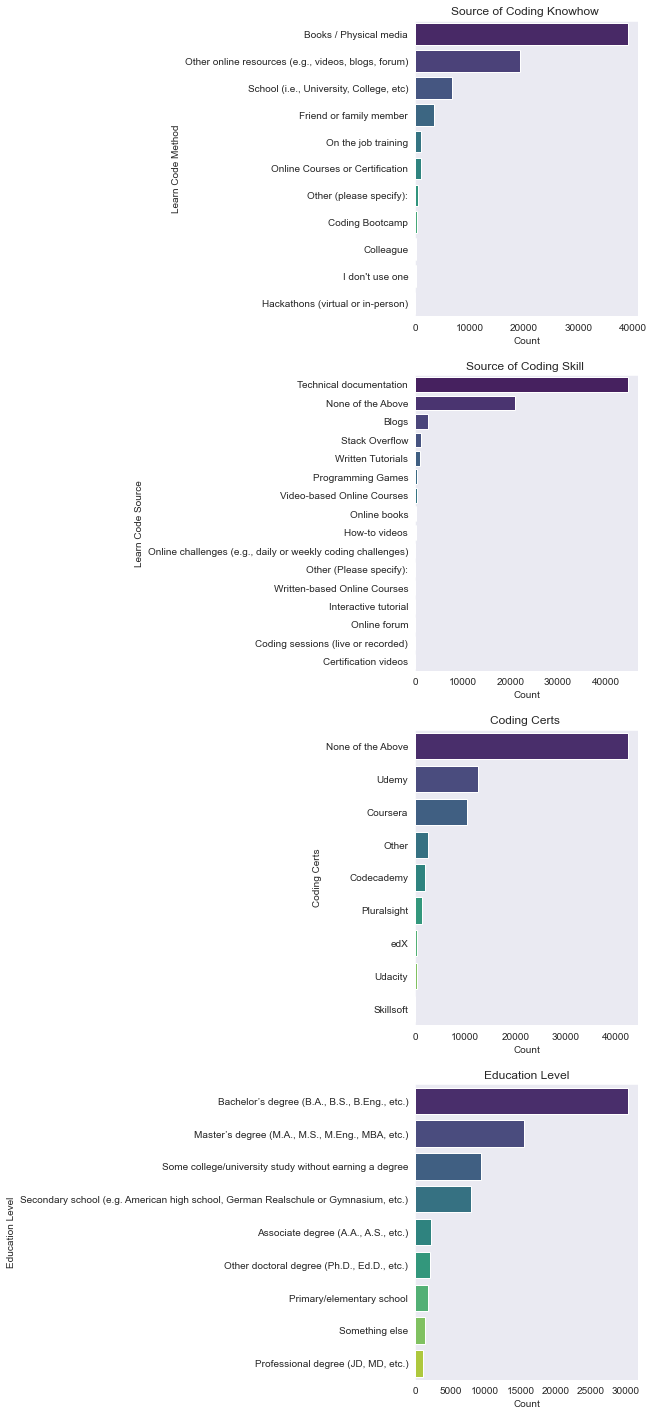

<Figure size 720x432 with 0 Axes>

In [146]:
fig, axes = plt.subplots(nrows=4, figsize=(4,25))
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Learn_Code_Method', order=df['Learn_Code_Method'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_ylabel('Learn Code Method')
axes[0].set_xlabel('Count')
axes[0].set_title('Source of Coding Knowhow ')

sns.countplot(data=df, y='Learn_Code_Source', order=df['Learn_Code_Source'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_ylabel('Learn Code Source')
axes[1].set_xlabel('Count')
axes[1].set_title('Source of Coding Skill ')

sns.countplot(data=df, y='Code_Certifications', order=df['Code_Certifications'].value_counts().index, palette='viridis', ax=axes[2])
axes[2].set_ylabel('Coding Certs')
axes[2].set_xlabel('Count')
axes[2].set_title('Coding Certs ')

sns.countplot(data=df, y='Education_Level', order=df['Education_Level'].value_counts().index, palette='viridis', ax=axes[3])
axes[3].set_ylabel('Education Level')
axes[3].set_xlabel('Count')
axes[3].set_title('Education Level');

#### Employment Status & Work Style


In [147]:
empl = ['Retired', 'I prefer not to say',
       'Not employed, not searching', 'Employed, part-time',
       'Not employed, searching', 'Student, part-time',
       'consultant/freelance',
       'Student, full-time', 'Employed, full-time']

wkstlls = ['Full in-person', 'None',
       'Hybrid', 'Fully remote']

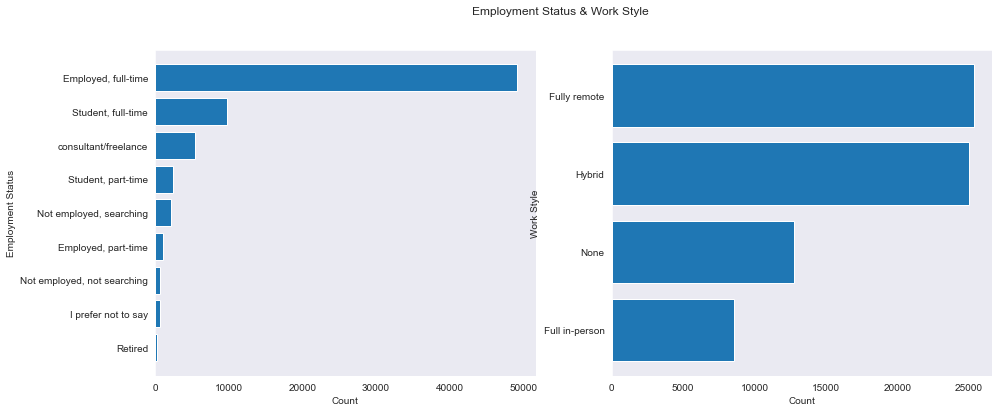

In [148]:
emp = df.Employment_Status.value_counts().sort_values(ascending=True)
wkstl = df.Remote_vs_Onsite.value_counts().sort_values(ascending=True)

fig, axes = plt.subplots(ncols=2, figsize=(15,6))

fig.suptitle('Employment Status & Work Style')
axes[0].barh(emp.index, emp.values)
axes[0].set_ylabel('Employment Status')
axes[0].set_xlabel('Count')
axes[0].set_yticks(range(len(empl)))
axes[0].set_yticklabels(empl)
axes[1].barh(wkstl.index, wkstl.values)
axes[1].set_ylabel('Work Style')
axes[1].set_xlabel('Count')
axes[1].set_yticks(range(len(wkstlls)))
axes[1].set_yticklabels(wkstlls);


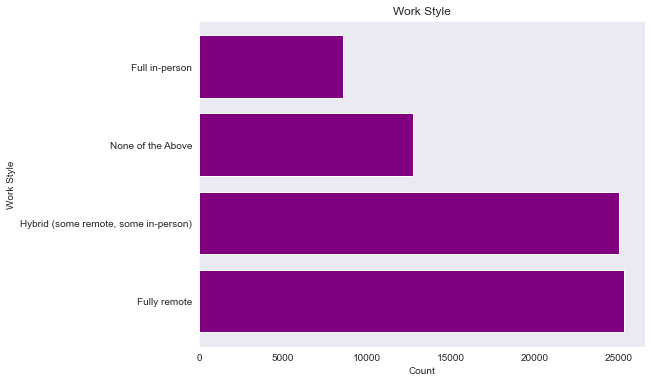

In [149]:
import matplotlib.pyplot as plt

wkstl = df.Remote_vs_Onsite.value_counts().sort_values(ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(wkstl.index, wkstl.values, color='purple')
plt.title('Work Style')
plt.xlabel('Count')
plt.ylabel('Work Style')
plt.gca().invert_yaxis()

plt.show()


#### Annual Salary

#### Annual Salary Distribution

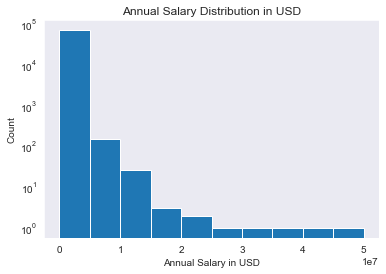

In [150]:
plt.hist(df.Annual_Salary)
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Annual Salary in USD')
plt.title('Annual Salary Distribution in USD');

#### Salary Distribution by Continent

North American developers are the most well-paid, followed by Oceania and Europe

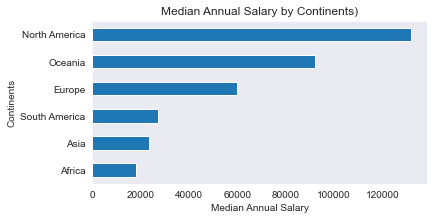

In [151]:
salo_sorted = salo.sort_values(ascending=True)
plt.figure(figsize=(6, 3))
salo_sorted.plot(kind='barh')
plt.ylabel('Continents')
plt.xlabel('Median Annual Salary')
plt.title('Median Annual Salary by Continents)');

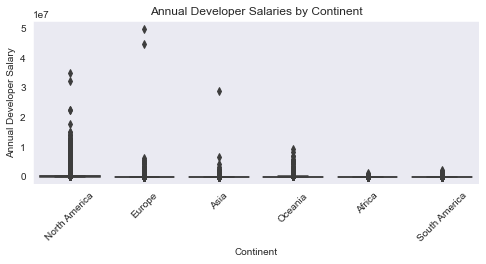

In [152]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(x='continents', y='Annual_Salary', data=df)
plt.xticks(rotation=45)
plt.xlabel('Continent')
plt.ylabel('Annual Developer Salary')
plt.title('Annual Developer Salaries by Continent')
plt.show()

#### Developer Tools By Salary

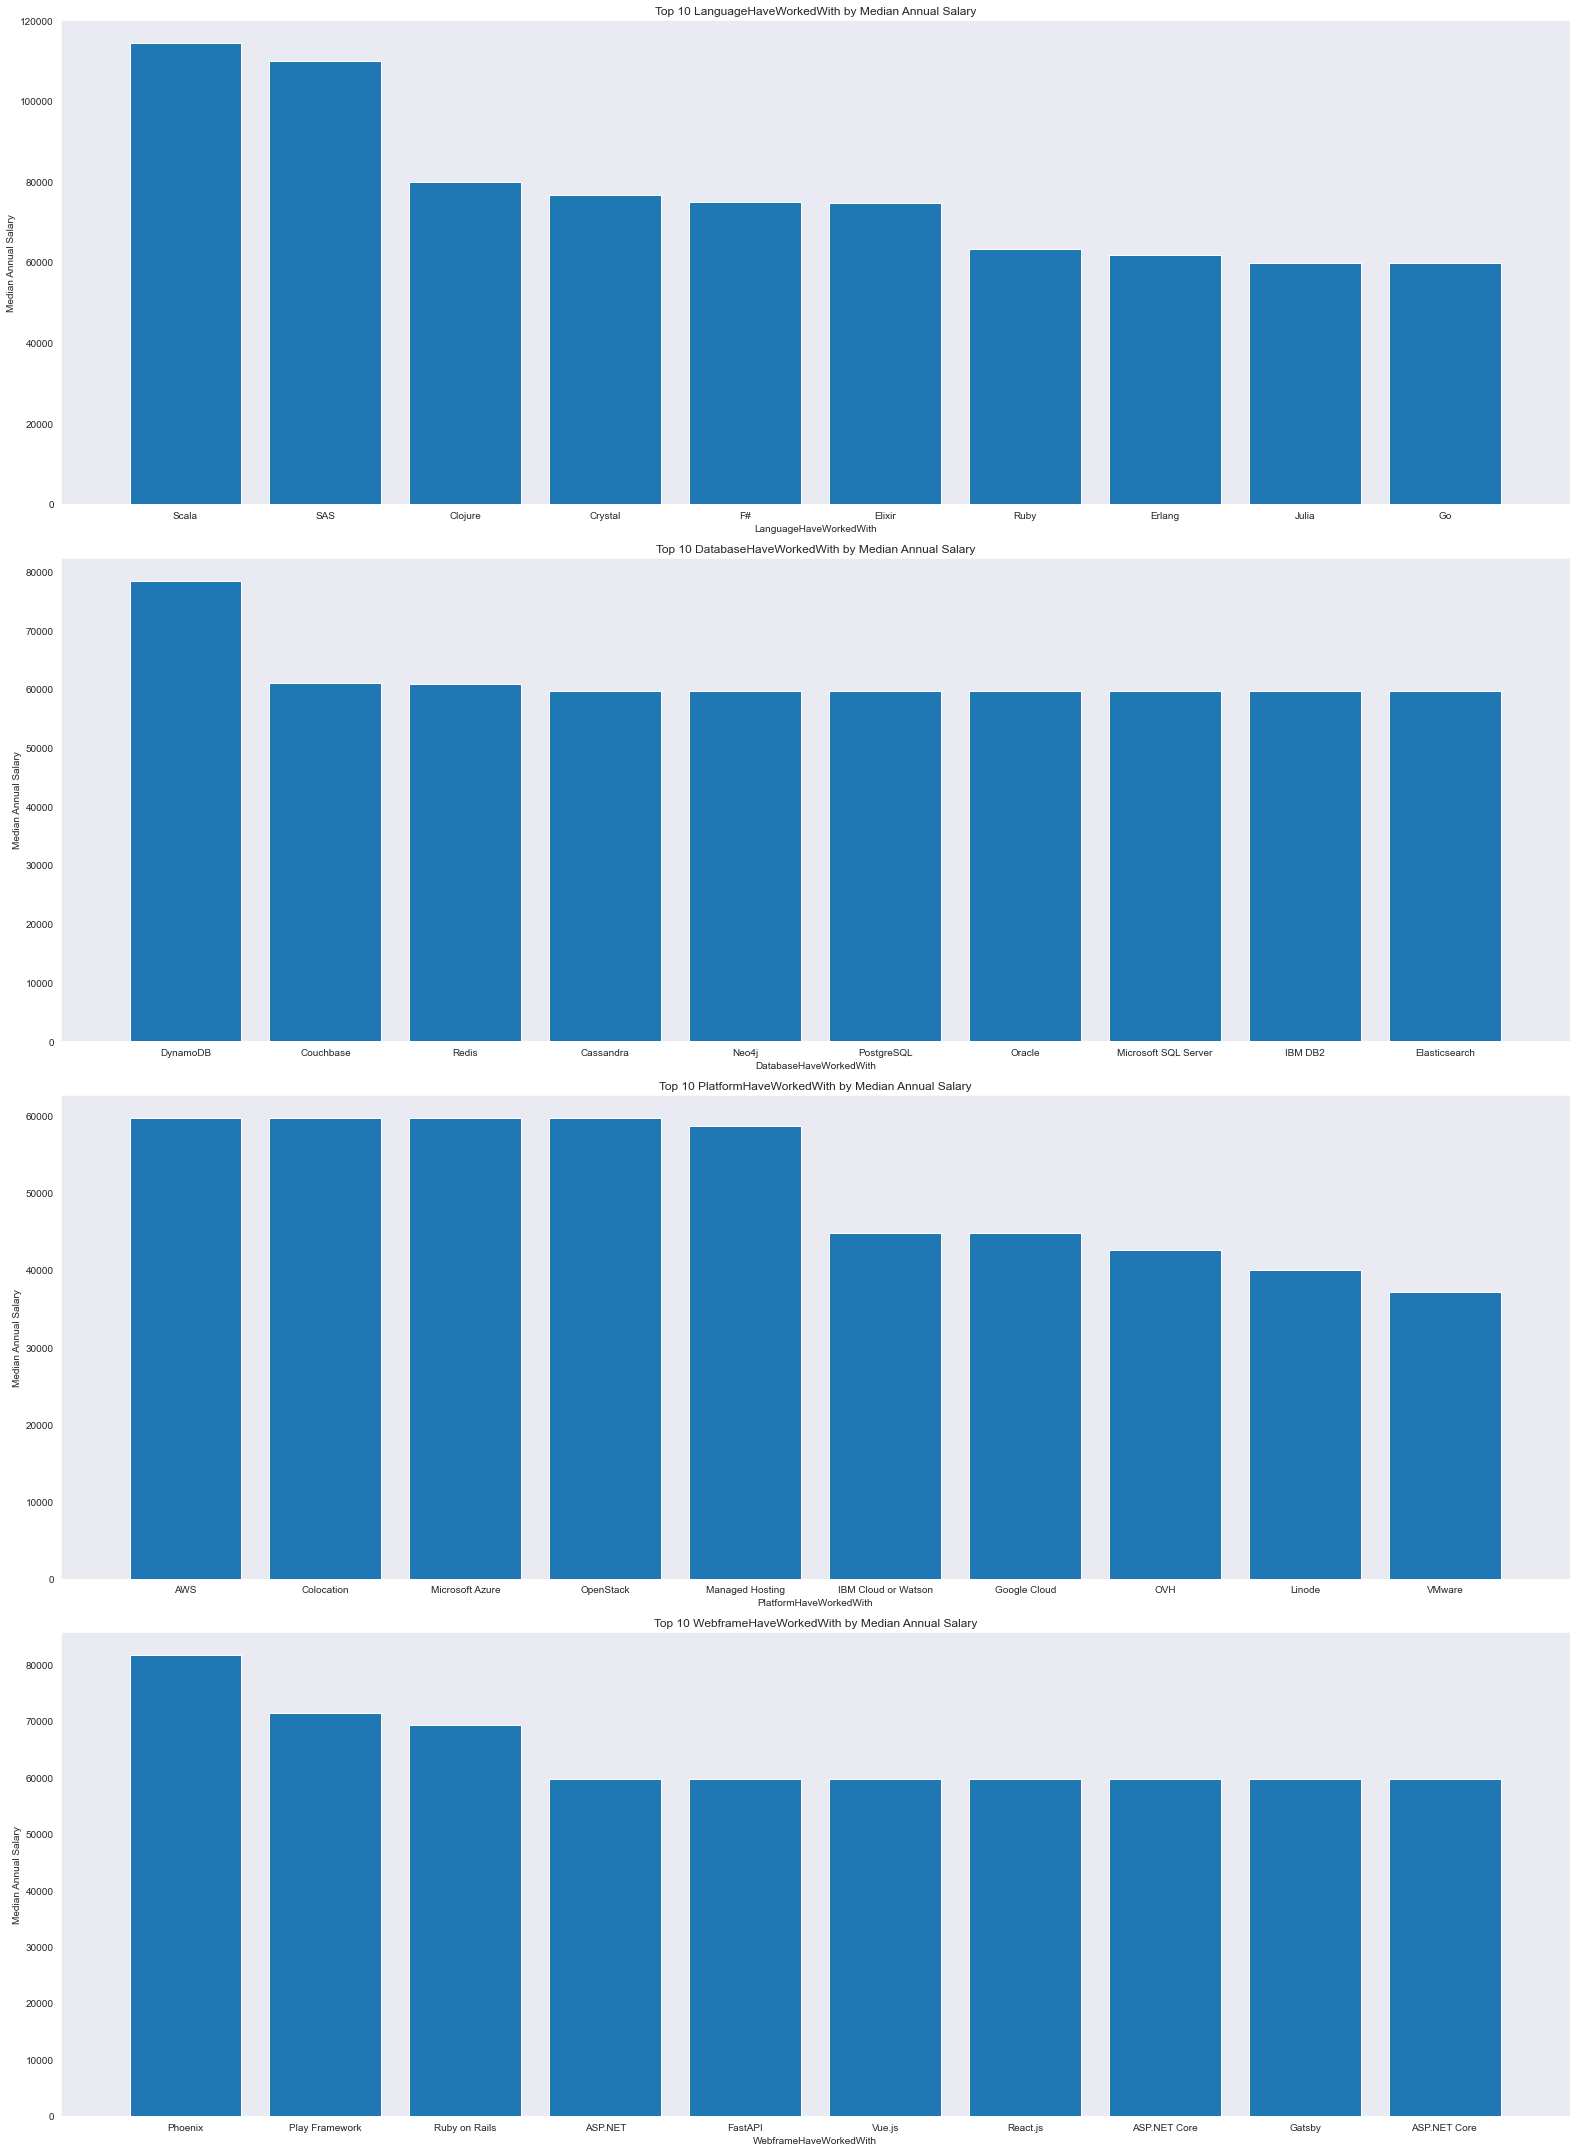

In [153]:
# Create subplots with 4 rows
fig, axes = plt.subplots(nrows=4, figsize=(22, 30))
# Define the columns to plot
columns_to_plot = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith']
# Iterate over the columns and create plots
for i, column in enumerate(columns_to_plot):
    # Group the data by column and calculate the average annual salary
    median_salary_by_column = df.groupby(column)['Annual_Salary'].median().reset_index()
    median_salary_by_column = median_salary_by_column.sort_values('Annual_Salary', ascending=False)
    top_10_categories = median_salary_by_column.head(10)
    # Create the bar plot for each column
    axes[i].bar(top_10_categories[column], top_10_categories['Annual_Salary'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Median Annual Salary')
    axes[i].set_title(f'Top 10 {column} by Median Annual Salary')
    #axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor', ha='right')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

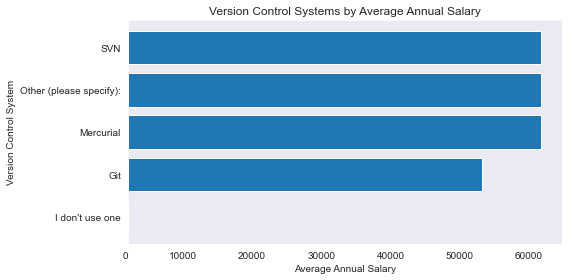

In [154]:
# Group the data by VersionControlSystem and calculate the median annual salary
average_salary_by_version_control = df.groupby('VersionControlSystem')['Annual_Salary'].median().reset_index()
average_salary_by_version_control = average_salary_by_version_control.sort_values('Annual_Salary', ascending=True)
# Create the vertical bar plot for VersionControlSystem
plt.figure(figsize=(8, 4))
plt.barh(average_salary_by_version_control['VersionControlSystem'], average_salary_by_version_control['Annual_Salary'])
plt.ylabel('Version Control System')
plt.xlabel('Average Annual Salary')
plt.title('Version Control Systems by Average Annual Salary')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## Multivariate Analysis

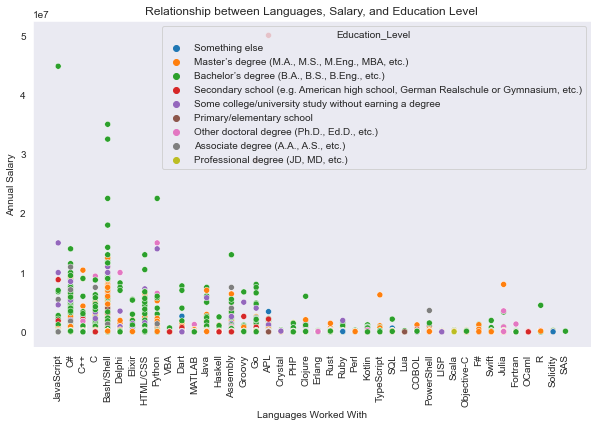

In [155]:
# Subset the relevant columns
subset_df = df[["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"]]

# Filter out rows with missing values in any of the selected columns
subset_df = subset_df.dropna(subset=["LanguageHaveWorkedWith", "Annual_Salary", "Education_Level"])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x="LanguageHaveWorkedWith", y="Annual_Salary", hue="Education_Level")
plt.xticks(rotation=90)
plt.xlabel("Languages Worked With")
plt.ylabel("Annual Salary")
plt.title("Relationship between Languages, Salary, and Education Level")
plt.show()

# Data Preprocessing

### Feature Selection
Feature selection was done initially using domain knowledge to come up with a preliminary list of features that need to be further explored on.
Correlation was then performed to identify features that are most co-related to the target variable, annual salary, and the final list of 10 features to be used in the model in the prediction of developer salaries was obtained.

In the initial selection, domain knowledge was used and a list of all columns dropped was created, 'deletedf', and another list of all selected features was named 'selectorf'

In [156]:
# A list of dropped columns in initial feature selection
deletedf = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeWantToWorkWith',
'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith', 'Proj_Mgmt_WantToWorkWith',
'Proj_Mgmt_SyncWantToWorkWith', 'Blockchain_Sentiment', 'New_Stack_Overfl_Sites', 'SOVisitFreq', 'SOAccount_Ownership',
'SOA_ParticipationFreq', 'Belong_SO_Comm', 'Participation_PDS', 'Contributor_or_Manager', 'Extroverted', 'Siloed_Teams',
'Information_Availability', 'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos', 'TimeSearching_Answers', 'TimeAnswering',
'Onboarding_Duration', 'ProfessionalTech', 'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support',
'SurveyLength', 'SurveyEase', 'Purchase_Research', 'OpSysPersonal_use', 'VersionControlSystem', 'VCInteraction',
'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_SyncHaveWorkedWith', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Disability',
'MentalHealth', 'continents', 'Learn_Code_Method', 'Learn_Code_Source', 'DatabaseHaveWorkedWith', 'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OrgSize', 'Coding_Experience', 'Outofwork_Coding',
'PlatformHaveWorkedWith', 'OpSysProfessional_use', 'ToolsTechHaveWorkedWith']

# A list of selected features in initial feature selection
selectorf = ['Developer_Description', 'Employment_Status','Remote_vs_Onsite', 'Outofwork_Coding', 'Education_Level',
       'Learn_Code_Method', 'Learn_Code_Source', 'Code_Certifications','Coding_Experience', 'Pro_Experience', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'Country','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith','WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith','OpSysProfessional_use', 'OpSysPersonal_use', 
       'VersionControlSystem','VCInteraction', 'Proj_Mgmt_HVWorkedWith','Proj_Mgmt_SyncHaveWorkedWith','Age','Gender', 'Trans', 'Sexuality', 
       'Ethnicity', 'Disability','MentalHealth', 'Annual_Salary', 'continents']

# Printing the length of these features:
print(len(deletedf), len(selectorf))


62 36


### Encoding Features

Encoding was performed using two types of encoders:
- Binary encoding. This was done on features that had categories with no inherent order in them. Binary encoding was chosen over One-hot encoding in order to reduce the number of columns added after encoding.
- Ordinal encoding. This was performed on the features that have inherent order in them. They were sorted in descending order and ordinal encoding performed on them.
- Label encoding. This was performed on the target variable 'annual salary

In [157]:
# A list of features to be binary encoded.
columns_to_binary_encode = ['Employment_Status', 'ProfessionalTech', 'OpSysPersonal_use', 'OpSysProfessional_use',
                            'Remote_vs_Onsite','Developer_Description', 'Outofwork_Coding', 'Learn_Code_Method',
                            'Learn_Code_Source', 'Code_Certifications', 'DevType', 'Purchase_Research', 'Country',
                            'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'LanguageWantToWorkWith',
                            'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
                            'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
                            'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
                            'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'VersionControlSystem',
                            'VCInteraction', 'Proj_Mgmt_HVWorkedWith', 'Proj_Mgmt_WantToWorkWith',
                            'Proj_Mgmt_SyncHaveWorkedWith', 'Proj_Mgmt_SyncWantToWorkWith', 'New_Stack_Overfl_Sites',
                            'SOAccount_Ownership', 'Belong_SO_Comm', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                            'Disability', 'MentalHealth', 'Participation_PDS', 'Contributor_or_Manager',
                            'Is_Involved_Onboarding', 'Employer_Learning_Resources', 'Learning_Support', 'continents' ]

# A list of columns to be ordinal encoded
columns_to_ordinal_encode = ['Education_Level', 'OrgSize', 'PurchaseInfluence', 'Blockchain_Sentiment', 'SOVisitFreq',
                             'SOA_ParticipationFreq', 'Age', 'Extroverted', 'Siloed_Teams', 'Information_Availability',
                             'Well_Resourced', 'Info_Answ_Resource', 'Recurring_Responses', 'Workflow_Interruptions',
                             'External_Team_Assistance', 'External_Team_Interaction', 'Knowledge_Silos',
                             'TimeSearching_Answers', 'TimeAnswering', 'Onboarding_Duration', 'SurveyLength', 'SurveyEase']

# A list of numerical columns
numeric_cols = ['Coding_Experience', 'Pro_Experience','Annual_Salary']


In [158]:
columns_to_binary_encode_set = set(columns_to_binary_encode)
columns_to_ordinal_encode_set = set(columns_to_ordinal_encode)
deletedf_set = set(deletedf)

final_to_binary_encode = list(columns_to_binary_encode_set - deletedf_set)
final_to_ordinal_encode = list(columns_to_ordinal_encode_set - deletedf_set)

print(len(final_to_binary_encode))
print(len(final_to_ordinal_encode))
print(len(selectorf))

7
2
36


From inspection, work experience is the same as proffessional experience and it was therefore dropped.

ResponseID was also dropped as it is unnecessary in the modelling process

In [159]:
# droping work experience as its correlated to professional experience, hence duplication
df = dropping_columns(df, 'WorkExp')
df = dropping_columns(df, 'ResponseId')

Defining a class Data encoder that is used to encode the features

In [160]:

class DataEncoder:
    def __init__(self, df):
        self.df = df

    def perform_binary_encoding(self, columns):
        # Creating a copy of the original DataFrame
        df_encoded = self.df.copy()
        
        # Perform Binary Encoding for each specified column
        for column in columns:
            binary_encoder = ce.BinaryEncoder(cols=[column])
            df_encoded = binary_encoder.fit_transform(df_encoded)
        
        return df_encoded

    def perform_ordinal_encoding(self, columns):
        # Creating a copy of the original DataFrame
        df_encoded = self.df.copy()
        
        # Performing Ordinal Encoding for each specified column
        for column in columns:
            ordinal_encoder = ce.OrdinalEncoder(cols=[column])
            df_encoded[column] = ordinal_encoder.fit_transform(df_encoded[column])
        
        return df_encoded


#### Binary encoding

In [161]:
# Initializing DataEncoder
data_encoder = DataEncoder(df)

# Performing binary encoding
df_encoded_binary = data_encoder.perform_binary_encoding(final_to_binary_encode)
# Displaying the encoded dataframe
df_encoded_binary.head(2)

,Developer_Description_0,Developer_Description_1,Developer_Description_2,Employment_Status_0,Employment_Status_1,Employment_Status_2,Employment_Status_3,Remote_vs_Onsite_0,Remote_vs_Onsite_1,Remote_vs_Onsite_2,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,0,0,1,0,0,0,1,0,0,1,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,0,1,0,0,0,0,1,0,1,0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe


#### Ordinal encoding

In [162]:
# Performing Ordinal Encoding
df_encod = data_encoder.perform_ordinal_encoding(final_to_ordinal_encode)
# Displaying the encoded dataframe
df_encod.head(2)

,Developer_Description,Employment_Status,Remote_vs_Onsite,Outofwork_Coding,Education_Level,Learn_Code_Method,Learn_Code_Source,Code_Certifications,Coding_Experience,Pro_Experience,...,TimeAnswering,Onboarding_Duration,ProfessionalTech,Is_Involved_Onboarding,Employer_Learning_Resources,Learning_Support,SurveyLength,SurveyEase,Annual_Salary,continents
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,1,I don't use one,None of the Above,None of the Above,9.0,7.0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Too long,Difficult,132000.0,North America
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,2,Books / Physical media,Technical documentation,None of the Above,14.0,5.0,...,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Appropriate in length,Neither easy nor difficult,40205.0,Europe


Deleting all the deleated columns confirming that all columns have been encoded

In [163]:
# dropping deleted columns
df_encod = dropping_columns(df_encod, deletedf)

# confirm no categorical variables
print(df_encod.select_dtypes(include='object').columns)
df_encod.head()

Index(['Developer_Description', 'Employment_Status', 'Remote_vs_Onsite',
       'Code_Certifications', 'DevType', 'Country', 'LanguageHaveWorkedWith'],
      dtype='object')


,Developer_Description,Employment_Status,Remote_vs_Onsite,Education_Level,Code_Certifications,Pro_Experience,DevType,PurchaseInfluence,Country,LanguageHaveWorkedWith,Annual_Salary
1,I am a developer by profession,"Employed, full-time",Fully remote,1,None of the Above,7.0,None of the Above,1,Canada,JavaScript,132000.0
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",2,None of the Above,5.0,Data scientist or machine learning specialist,2,United Kingdom of Great Britain and Northern I...,C#,40205.0
3,I am a developer by profession,"Employed, full-time",Fully remote,3,None of the Above,17.0,"Developer, full-stack",2,Israel,C#,215232.0
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",3,None of the Above,3.0,"Developer, front-end",2,United States of America,C#,132000.0
5,"I am not primarily a developer, but I write co...","Student, full-time",None of the Above,2,None of the Above,7.0,None of the Above,1,Germany,C++,0.0


Looking at the correlation between the initially selected features to the target variable `Annual Salary`

In [164]:
corr = pd.DataFrame(abs(df_encod.corr()['Annual_Salary']).sort_values(ascending=False))
corr

,Annual_Salary
Annual_Salary,1.000000
PurchaseInfluence,0.079773
Pro_Experience,0.056295
Education_Level,0.012199


After reviewing the correlation of the variables, we narrowed down on the variables below by looking at the top correlations to `Annual_Salary`. We also used domain knowledge to include some columns like `Education_Level` and `Code_Certifications`.

In [165]:
finalf = ['Code_Certifications', 'Education_Level', 'Employment_Status', 'PurchaseInfluence', 'Country', 'Pro_Experience',
'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith', 'Developer_Description', 'Annual_Salary' ]

finalbi = ['Code_Certifications', 'Employment_Status', 'Country', 'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith',
           'Developer_Description']
finalord = ['PurchaseInfluence', 'Education_Level']
finalnum = ['Pro_Experience']

In [166]:
data_anto = df[finalf]
label_encode = ['Code_Certifications', 'Employment_Status', 'Country', 'Remote_vs_Onsite', 'DevType', 'LanguageHaveWorkedWith',
           'Developer_Description']
ordinal_encode = ['PurchaseInfluence', 'Education_Level']

#### Final List of Selected Features

In [167]:
data_anto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71711 entries, 1 to 73267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Certifications     71711 non-null  object 
 1   Education_Level         71711 non-null  object 
 2   Employment_Status       71711 non-null  object 
 3   PurchaseInfluence       71711 non-null  object 
 4   Country                 71711 non-null  object 
 5   Pro_Experience          71711 non-null  float64
 6   Remote_vs_Onsite        71711 non-null  object 
 7   DevType                 71711 non-null  object 
 8   LanguageHaveWorkedWith  71711 non-null  object 
 9   Developer_Description   71711 non-null  object 
 10  Annual_Salary           71711 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.1+ MB


Mapping Ordinal Categories

In [168]:
# Function to map categories:
def map_dictionary_to_column(dictionary, df, column):
    df[column] = df[column].map(dictionary)
    return df
# Dictionaries

PI = {'None of the Above': 0, 'I have little or no influence': 1, 'I have some influence': 2, 'I have a great deal of influence': 3}

EL = {'Something else': 0, 'Primary/elementary school': 1, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
      'Some college/university study without earning a degree': 3, 'Associate degree (A.A., A.S., etc.)':4, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':5,
      'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':6, 'Professional degree (JD, MD, etc.)':7, 'Other doctoral degree (Ph.D., Ed.D., etc.)':8}

ES = {'Employed, full-time':8,'Student, full-time': 1, 'Independent contractor, freelancer, or self-employed': 6,'Student, part-time': 2,'Not employed, but looking for work':5,
      'Employed, part-time':7,'Not employed, and not looking for work':3,'I prefer not to say':4, 'Retired':0}

CC = {'None of the Above': 0, 'Udemy': 1, 'Coursera': 2, 'Other': 3, 'Codecademy':4, 'Pluralsight':5,
      'edX':6, 'Udacity':7, 'Skillsoft':8}

country_code = {'Canada': 0, 'United Kingdom of Great Britain and Northern Ireland': 1,
               'Israel': 2, 'United States of America': 3, 'Germany': 4, 'India': 5,
               'Netherlands': 6, 'Croatia': 7, 'Australia': 8, 'Russian Federation': 9,
               'Czech Republic': 10, 'Austria': 11, 'Serbia': 12, 'Italy': 13, 'Ireland': 14,
               'Poland': 15, 'Slovenia': 16, 'Iraq': 17, 'Sweden': 18, 'Madagascar': 19, 'Norway': 20,
               'Taiwan': 21, 'Hong Kong (S.A.R.)': 22, 'Mexico': 23, 'France': 24, 'Brazil': 25,
               'Lithuania': 26, 'Uruguay': 27, 'Denmark': 28, 'Spain': 29, 'Turkey': 30,
               'South Africa': 31, 'Ukraine': 32, 'Finland': 33, 'Romania': 34, 'Portugal': 35,
               'Singapore': 36, 'Oman': 37, 'Belgium': 38, 'Chile': 39, 'Bulgaria': 40, 'Latvia': 41,
               'Philippines': 42, 'Greece': 43, 'Belarus': 44, 'Saudi Arabia': 45, 'Kenya': 46,
               'Switzerland': 47, 'Iceland': 48, 'Viet Nam': 49, 'Thailand': 50, 'China': 51,
               'Montenegro': 52, 'Slovakia': 53, 'Japan': 54, 'Luxembourg': 55, 'Argentina': 56,
               'Hungary': 57, 'Tunisia': 58, 'Bangladesh': 59, 'Maldives': 60,
               'Dominican Republic': 61, 'Egypt': 62, 'Jordan': 63, 'Pakistan': 64, 'Nepal': 65,
               'Iran, Islamic Republic of...': 66, 'Indonesia': 67, 'Ecuador': 68,
               'Bosnia and Herzegovina': 69, 'Armenia': 70, 'Colombia': 71, 'Kazakhstan': 72,
               'South Korea': 73, 'Costa Rica': 74, 'Honduras': 75, 'Mauritius': 76, 'Estonia': 77,
               'Algeria': 78, 'Trinidad and Tobago': 79, 'Mali': 80, 'Morocco': 81, 'Swaziland': 82,
               'New Zealand': 83, 'The former Yugoslav Republic of Macedonia': 84,
               'Afghanistan': 85, 'Cyprus': 86, 'United Arab Emirates': 87, 'Peru': 88,
               'Uzbekistan': 89, 'Ethiopia': 90, 'Bahrain': 91, 'Malta': 92, 'Nicaragua': 93,
               'Andorra': 94, 'Republic of Korea': 95, 'Lebanon': 96, 'Belize': 97, 'Zambia': 98,
               'Bolivia': 99, 'Malaysia': 100, 'Sri Lanka': 101,
               "Lao People's Democratic Republic": 102, 'Guatemala': 103, 'Azerbaijan': 104,
               'Suriname': 105, 'El Salvador': 106, 'Syrian Arab Republic': 107, 'Qatar': 108,
               'Nigeria': 109, 'Kyrgyzstan': 110, 'Zimbabwe': 111, 'Rwanda': 112, 'Georgia': 113,
               'Cambodia': 114, 'Malawi': 115, 'Yemen': 116, 'Fiji': 117, 'Nomadic': 118, 'Uganda': 119,
               'Albania': 120, 'Timor-Leste': 121, 'Mongolia': 122, 'Republic of Moldova': 123,
               'Tajikistan': 124, 'Ghana': 125, 'United Republic of Tanzania': 126, 'Myanmar': 127,
               'Kuwait': 128, 'Cameroon': 129, 'Kosovo': 130, 'Jamaica': 131, 'Turkmenistan': 132, 'Benin': 133,
               'Botswana': 134, 'Niger': 135, 'Palestine': 136, 'Cape Verde': 137,
               'Libyan Arab Jamahiriya': 138, 'Venezuela, Bolivarian Republic of...': 139,
               'Senegal': 140, 'Cuba': 141, 'Togo': 142, 'Angola': 143, 'Isle of Man': 144, 'Panama': 145,
               'Bahamas': 146, 'Paraguay': 147, 'Sudan': 148, 'Liberia': 149, 'Bhutan': 150,
               'Democratic Republic of the Congo': 151, "Côte d'Ivoire": 152, 'Barbados': 153,
               'Congo, Republic of the...': 154, 'Namibia': 155, 'Somalia': 156, 'Sierra Leone': 157,
               'Mozambique': 158, 'Lesotho': 159, 'Chad': 160, 'North Korea': 161,
               'Antigua and Barbuda': 162, 'Papua New Guinea': 163, 'Palau': 164, 'Guinea': 165,
               'Haiti': 166, 'Gabon': 167, 'Mauritania': 168, 'San Marino': 169, 'Guyana': 170,
               'Saint Lucia': 171, 'Burkina Faso': 172, 'Brunei Darussalam': 173, 'Gambia': 174,
               'Monaco': 175, 'Djibouti': 176, 'Seychelles': 177, 'Solomon Islands': 178,
               'Saint Kitts and Nevis': 179}

RO = {'Fully remote': 0, 'Hybrid (some remote, some in-person)': 1, 'None of the Above': 2, 'Full in-person': 3}

DV = {'Developer, full-stack':16, 'Developer, front-end':15
,'Developer, back-end':14,'None of the Above':0,'Data scientist or machine learning specialist':27,'Engineer, data':26,'Developer, mobile':17,
'Developer, desktop or enterprise applications':18,'Student':2,'Other (please specify):':1,'Engineer, site reliability':20,
'Engineering manager':25,'Developer, embedded applications or devices':19,
'Academic researcher':3,'DevOps specialist':12,
'Developer, QA or test':28,'Educator':6,'Senior Executive (C-Suite, VP, etc.)':29,'Data or business analyst':21,'Project manager':11,
'Developer, game or graphics':22,'System administrator':10,'Cloud infrastructure engineer':23,'Database administrator':7,'Product manager':9,
'Security professional':24,'Scientist':13,'Designer':5,'Marketing or sales professional':4,'Blockchain':8}

programming_lang = {'JavaScript':42, 'HTML/CSS':41, 'SQL':40, 'Python':39, "TypeScript":38, 'Java':37, "Bash/Shell":36, "C#":35,
                   'C++':34, "PHP":33, "C":32, "PowerShell":31, "Go":30, "Rust":29, "Kotlin":28, "Dart":27, "Ruby":26, "Assembly":25,
                   "Swift":24, "R":23, "VBA":22, "MATLAB":21, "Lua":20, "Groovy":19, "Delphi":18, "Scala":17, "Objective-C":16,
                   "Perl":15, "Haskell":14, "Elixir":13, "Julia":12, "Clojure":11, 'Solidity':10, "LISP":9, 'F#':8, 'Fortran':7,
                   "Erlang":6, "APL":5, "COBOL":4, "SAS":3, "OCaml":2, "Crystal":1}

dev_desc = {'I am a developer by profession': 0, 'I am learning to code': 1, 'I am not primarily a developer, but I write code sometimes as part of my work': 2,
        'I code primarily as a hobby': 3, 'I used to be a developer by profession, but no longer am':4}


In [169]:
# Mapping Purchace Influence
data_anto = map_dictionary_to_column(PI, data_anto, 'PurchaseInfluence')

# Mapping Education Level
data_anto = map_dictionary_to_column(EL, data_anto, 'Education_Level')

# Mapping Employment status
data_anto = map_dictionary_to_column(ES, data_anto, 'Employment_Status')

# Mapping Code certifications
data_anto = map_dictionary_to_column(CC, data_anto, 'Code_Certifications')

# Mapping Countries
data_anto = map_dictionary_to_column(country_code, data_anto, 'Country')

# Mapping Remote_vs_onsite
data_anto = map_dictionary_to_column(RO, data_anto, 'Remote_vs_Onsite')

# Mapping DevType
data_anto = map_dictionary_to_column(DV, data_anto, 'DevType')

# Mapping LanguageHaveWorkedWith
data_anto = map_dictionary_to_column(programming_lang, data_anto, 'LanguageHaveWorkedWith')

#Mapping Developer_Description
data_anto = map_dictionary_to_column(dev_desc, data_anto, 'Developer_Description')


In [170]:
data_anto.head(3)

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description,Annual_Salary
1,0,0,8,0,0,7.0,0,0,42,0,132000.0
2,0,6,8,2,1,5.0,1,27,35,2,40205.0
3,0,5,8,2,2,17.0,0,16,35,0,215232.0


In [171]:
data_anto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71711 entries, 1 to 73267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Certifications     71711 non-null  int64  
 1   Education_Level         71711 non-null  int64  
 2   Employment_Status       71711 non-null  int64  
 3   PurchaseInfluence       71711 non-null  int64  
 4   Country                 71711 non-null  int64  
 5   Pro_Experience          71711 non-null  float64
 6   Remote_vs_Onsite        71711 non-null  int64  
 7   DevType                 71711 non-null  int64  
 8   LanguageHaveWorkedWith  71711 non-null  int64  
 9   Developer_Description   71711 non-null  int64  
 10  Annual_Salary           71711 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 9.1 MB


### Modeling
Our objective is to be able to make developer salary predictions based on chosen features from our dataset. This task is to be achieved by evalauting different algorithmns and checking to see whether they meet our evaluation metrics.

We will be evaluating the following algorithmns :

- Multiple Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- AdaBoostRegressor

#### Baseline Model

In [172]:
data_anto.isnull().any()

Code_Certifications       False
Education_Level           False
Employment_Status         False
PurchaseInfluence         False
Country                   False
Pro_Experience            False
Remote_vs_Onsite          False
DevType                   False
LanguageHaveWorkedWith    False
Developer_Description     False
Annual_Salary             False
dtype: bool

In [173]:
# split the data to train & test

X = data_anto.drop('Annual_Salary', axis=1)
y = data_anto['Annual_Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Multiple Linear Regression
Regression models describe the relationship between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variables change. Multiple linear regression models allow us to add an indefinate number of variables

In [174]:
# create a pipeline

pipe_1 = Pipeline([('lr', LinearRegression())])

# fit the training data

pipe_1.fit(X_train, y_train)

#predict on test data

y_pred_1 = pipe_1.predict(X_test)

In [175]:
# function to print model metrics
def print_metrics(labels, preds):
    RMSE = round(mean_squared_error(labels, preds, squared = False ), 2)
    print(f"The model has a {RMSE} chance of making an error")
    MAE = round(mean_squared_error(labels, preds), 2)
    print(f"The model has a Mean Absolute Error of {MAE}")
    R_squared = round(r2_score(labels, preds), 2)
    print(f"The proportion of variance explained by our model is {R_squared}")

print_metrics(y_test,y_pred_1)

The model has a 550029.26 chance of making an error
The model has a Mean Absolute Error of 302532188379.01
The proportion of variance explained by our model is 0.02


### Decision Tree Regressor
This is a non-parametric supervised learning method used for regression, the goal is to create a model that predicts the value of a target variable by learning simple decison rules inferred from the data features

In [176]:
# create a pipeline

pipe_2 = Pipeline([('mms', MinMaxScaler()),
                   ('tree', DecisionTreeRegressor(random_state=42))])

# fit the training data

pipe_2.fit(X_train, y_train)

# prediction on test data

y_pred_2 = pipe_2.predict(X_test)

Model Evaluation

In [177]:
print_metrics(y_test, y_pred_2)

The model has a 772253.87 chance of making an error
The model has a Mean Absolute Error of 596376040779.1
The proportion of variance explained by our model is -0.94


Note : for a least-squares regression model, R-squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closed to 1 represent an (almost) perfect fit.

An R-squared of 0 would mean that we are explaining 0% of the variation in y. This is especially likely to occur if your dataset is not actually suited to linear regression modelling.

A negative R-squared means that the model is worse at explaining the variance than the baseline model. A negative R-squared with ordinary least squares linear regression means that something is wrong with the code, because a linear regression with an independent variable is built on top of an intercept-only model

For predictive modelling, a higher R-squared is very important


### Need to Change From Regression to Classification

The target variable seems to not be **fitting well on the predictive algorithms** therefore we will change the problem statement **to a classifcation problem**, we do this by determing an ordinal range of salaries salaries within the industry this would allow developers know the range of money to earn dependng on certain variables, it will also address skills gap within a certain salary categories while also helping HR in decision making. The deployment would look like a developer stating the specific skills they have then an output of a range of salaries is given.

For classification, we will try the models below:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Classifier

In [178]:
# create a new col with salary values as categories
# Define the bin ranges
bins = [0, 5000, 15000, 25000, 50000, 100000, 200000, float('inf')]

# Define the labels for each category
labels = ['On average $5,000', '$5,000 - $15,000', '$15,000 - $30,000',
          '$30,000 - $50,000', '$50,000 - $100,000', '$100,000 - $200,000',
          'Over $200,000']

# Apply categorical encoding
data_anto.loc[:, 'year_salary'] = pd.cut(data_anto['Annual_Salary'], bins=bins, labels=labels, right=False)
data_anto.year_salary.value_counts()

$50,000 - $100,000     19707
On average $5,000      15969
$100,000 - $200,000    11818
$15,000 - $30,000       9174
$30,000 - $50,000       8182
Over $200,000           4077
$5,000 - $15,000        2784
Name: year_salary, dtype: int64

In [179]:
# drop annual salary, pro_experience col after the category feature engineering
ordinal_df = dropping_columns(data_anto, 'Annual_Salary')


From the new target categries above, we realised there was a class imbalance on some of the salary ranges. Below we correct for this using SMOTE

In [180]:
# address the class imbalance in the new salaries col
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X1, y1 = dropping_columns(ordinal_df, 'year_salary'), ordinal_df['year_salary']
imb = SMOTE(random_state=1)
X1res, y1res = imb.fit_resample(X1, y1)

# label encode y1res
le = LabelEncoder()
y1res_en = le.fit_transform(y1res)

In [181]:
X1res_train, X1res_test, y1res_train, y1res_test = train_test_split(X1res, y1res_en, test_size = 0.3, random_state = 1)

#### Logistic Regression

In [182]:

# create a pipeline
pipe_3 = Pipeline([('ss', StandardScaler()),
                   ('logreg', LogisticRegression(fit_intercept=True, C=1e12, solver = 'liblinear', dual=False))])

# fit the train data

pipe_3.fit(X1res_train, y1res_train)

# predict on test data

y_trainpred_3 = pipe_3.predict(X1res_train)
y_pred_3 = pipe_3.predict(X1res_test)

In [183]:
# function to print metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted', zero_division=1)))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))

    return None


print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3)


training metrics
__________________________________
Precision Score: 0.43990776699092654
Recall Score: 0.4420591524791848
Accuracy Score: 0.4420591524791848
F1 Score: 0.4180964541574076

test metrics
___________________________________
Precision Score: 0.43760144005245
Recall Score: 0.43991784462969674
Accuracy Score: 0.43991784462969674
F1 Score: 0.4153553189360933


In [184]:
# Hyperparameter tuning Logistic Regression using GridSearchCV
# Define the pipeline with hyperparameters to tune
pipe = Pipeline([('ss', StandardScaler()),
                 ('logreg', LogisticRegression())])
# Define the hyperparameter grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': [None, 'balanced']
}
# Perform grid search with cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X1res_train, y1res_train)
# Get the best hyperparameter values
print('best_params: ', grid.best_params_)


best_params:  {'logreg__C': 10, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}


In [185]:
# run the tuned model
pipe_3t = Pipeline([('ss', StandardScaler()),
                   ('logreg', LogisticRegression(class_weight='balanced', C=1, solver='lbfgs' , penalty='l2'))])

# fit the train data
pipe_3t.fit(X1res_train, y1res_train)

# predict on test data

y_trainpred_3t = pipe_3t.predict(X1res_train)
y_pred_3t = pipe_3t.predict(X1res_test)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_3t)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_3t)

training metrics
__________________________________
Precision Score: 0.4420382032402886
Recall Score: 0.44616005964955885
Accuracy Score: 0.44616005964955885
F1 Score: 0.42898019135234833

test metrics
___________________________________
Precision Score: 0.44484155561820865
Recall Score: 0.44765011477588496
Accuracy Score: 0.44765011477588496
F1 Score: 0.43058547107249256


#### K-Nearest Neighbors

In [186]:
# create a pipeline

pipe_4 = Pipeline([('ss', StandardScaler()),
                   ('neighbors', KNeighborsClassifier())])

# fit the training data

pipe_4.fit(X1res_train, y1res_train)

# predict on test data

y_pred_4 = pipe_4.predict(X1res_test)
y_trainpred_4 = pipe_4.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_4)


KeyboardInterrupt: 

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
# Create a KNN classifier
knn = KNeighborsClassifier()
# Create a GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(X1res_train, y1res_train)
# Get the best parameters
best_params = grid_search.best_params_
# Print the best parameters
print("Best parameters:", best_params)
# predict on test data
y_pred_g_4 = grid_search.predict(X1res_test)
y_trainpred_g_4 = grid_search.predict(X1res_train)
print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_g_4)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_g_4)

Best parameters: {'n_neighbors': 1}
training metrics
__________________________________
Precision Score: 0.9803896365126297
Recall Score: 0.9803757093740939
Accuracy Score: 0.9803757093740939
F1 Score: 0.9803813791569449

test metrics
___________________________________
Precision Score: 0.7589297339864473
Recall Score: 0.766533768273529
Accuracy Score: 0.766533768273529
F1 Score: 0.7597466005374883


#### Decision Trees Classiffier

In [ ]:
# create a pipeline
pipe_6 = Pipeline([('ss', StandardScaler()),
                   ('tree', DecisionTreeClassifier())])

# fit the training data

pipe_6.fit(X1res_train, y1res_train)

# predict on test data

y_pred_6 = pipe_6.predict(X1res_test)
y_trainpred_6 = pipe_6.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_6)


training metrics
__________________________________
Precision Score: 0.9840397501358293
Recall Score: 0.9839484694088895
Accuracy Score: 0.9839484694088895
F1 Score: 0.9839609926595705

test metrics
___________________________________
Precision Score: 0.699009790067675
Recall Score: 0.7010269421287906
Accuracy Score: 0.7010269421287906
F1 Score: 0.6998021856242485


In [ ]:
# Perform grid search with 5-fold cross-validation
param_grid = {
    'tree__max_depth': [3, 4, 5],  # Vary the maximum depth
    'tree__min_samples_leaf': [1, 2, 3],  # Vary the minimum number of samples required at leaf nodes
    'tree__max_features': [None, 'sqrt', 'log2'],  # Vary the maximum number of features to consider
    'tree__min_samples_split': [2, 5, 10]  # Vary the minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(pipe_6, param_grid, cv=5)
grid_search.fit(X1res_train, y1res_train)
# Get the best model
best_model = grid_search.best_estimator_
# Print the best parameter values
print('Best Parameter Values:')
print('______________________')
print(grid_search.best_params_)

Best Parameter Values:
______________________
{'tree__max_depth': 5, 'tree__max_features': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 10}


In [ ]:
# run decision tree with tuned parameters
pipe_6t = Pipeline([('ss', StandardScaler()),
                   ('tree', DecisionTreeClassifier(max_depth = 5, max_features = None,
                                                   min_samples_leaf = 1, min_samples_split = 10))])
# fit the training data
pipe_6t.fit(X1res_train, y1res_train)
# predict on test data
y_pred_6t = pipe_6t.predict(X1res_test)
y_trainpred_6t = pipe_6t.predict(X1res_train)
print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_6t)
print('\ntest metrics')
print('___________________________________')
print(print_metrics(y1res_test, y_pred_6t))

training metrics
__________________________________
Precision Score: 0.5108699399282145
Recall Score: 0.5060063791889317
Accuracy Score: 0.5060063791889317
F1 Score: 0.48583663745023004

test metrics
___________________________________
Precision Score: 0.5097928820501648
Recall Score: 0.504095686843059
Accuracy Score: 0.504095686843059
F1 Score: 0.4839816152370855
None


#### Random Forest Classier
We tried 2 options:
- random forest with default parameters
- random forest tuned hyper parameters

In [ ]:
# create a pipeline
pipe_7 = Pipeline([('ss', StandardScaler()),
                   ('rand', RandomForestClassifier())])

# fit the training data

pipe_7.fit(X1res_train, y1res_train)

# predict on test data

y_pred_7 = pipe_7.predict(X1res_test)
y_trainpred_7 = pipe_7.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7)

training metrics
__________________________________
Precision Score: 0.9840061262918375
Recall Score: 0.9839484694088895
Accuracy Score: 0.9839484694088895
F1 Score: 0.9839558957641182

test metrics
___________________________________
Precision Score: 0.7551405093117503
Recall Score: 0.7554911199710039
Accuracy Score: 0.7554911199710039
F1 Score: 0.7546771037890873


In [ ]:
# Hyperparameter tuning Random Forest
# Create a pipeline
pipe_7 = Pipeline([('ss', StandardScaler()),
                   ('rand', RandomForestClassifier(n_estimators=100,
                                                  max_depth=100,
                                                  min_samples_split=10,
                                                  min_samples_leaf=3,
                                                  max_features='sqrt'))])
# Fit the training data
pipe_7.fit(X1res_train, y1res_train)
# Predict on test data
y_pred_7t = pipe_7.predict(X1res_test)
y_trainpred_7t = pipe_7.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_7t)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_7t)

training metrics
__________________________________
Precision Score: 0.8587743654702262
Recall Score: 0.858694751667288
Accuracy Score: 0.858694751667288
F1 Score: 0.8582382920582087

test metrics
___________________________________
Precision Score: 0.7211258368981486
Recall Score: 0.7194635737586081
Accuracy Score: 0.7194635737586081
F1 Score: 0.7185673729683849


#### XG Boost

In [ ]:
# create a pipeline
pipe_9 = Pipeline([('ss', StandardScaler()),
                   ('xgb', xgb.XGBClassifier())])

# fit the training data

pipe_9.fit(X1res_train, y1res_train)

# predict on test data

y_pred_9 = pipe_9.predict(X1res_test)
y_trainpred_9 = pipe_9.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_9)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_9)

training metrics
__________________________________
Precision Score: 0.7401404976969302
Recall Score: 0.7399652044240089
Accuracy Score: 0.7399652044240089
F1 Score: 0.7391480647121705

test metrics
___________________________________
Precision Score: 0.6875629113458344
Recall Score: 0.6874954693729612
Accuracy Score: 0.6874954693729612
F1 Score: 0.6864589180692273


XG boost holds the most promise as it has the least gap betweeen training and test metrics, thus less prone to overfitting. It is thus the best candidate for hyperparameter tuning. Below we tune some hyperparameters and rerun the model

In [ ]:
# identify XG boost hyperparameters
# for tuning

from sklearn.metrics import f1_score, make_scorer

xgb_params = [{
    "xgb__max_depth": [4, 5, 7],
    "xgb__learning_rate": [0.1, 0.01],
    "xgb__gamma": [0.25, 0.5],
    "xgb__reg_lambda": [0, 1, 10],
    "xgb__subsample": [0.8],
    "xgb__colsample_bytree": [0.5],
}]

# Creating a GridSearchCV with xgb_model as the estimator
gsv_xgb= GridSearchCV(estimator=pipe_9,
                       param_grid=xgb_params,
                       cv=5,
                       scoring='accuracy',
                       verbose=1)

# Fitting the model
gsv_xgb.fit(X1res_train, y1res_train)

# Get pest parametors
print('best params: ', gsv_xgb.best_params_)
print('best estimator: ', gsv_xgb.best_estimator_, '\n')

# predict on test data

#y_pred_9 = gsv_xgb.best_estimator_.predict(X1res_test)
#y_trainpred_9 = gsv_xgb.best_estimator_(X1res_train)

#print('training metrics')
#print('__________________________________')
#print_metrics(y1res_train, y_trainpred_9)
#print('\ntest metrics')
#print('___________________________________')
#print_metrics(y1res_test, y_pred_9)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 59.4min finished


best params:  {'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0.5, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__reg_lambda': 0, 'xgb__subsample': 0.8}
best estimator:  Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=N

In [ ]:
# create a pipeline
pipe_10 = Pipeline([('ss', StandardScaler()), ('xgb', xgb.XGBClassifier(
    colsample_bytree=0.5, gamma=0.5, learning_rate=0.1, max_depth=7,
    reg_lambda=2, subsample=0.8))])

# fit the training data

pipe_10.fit(X1res_train, y1res_train)

# predict on test data

y_pred_10 = pipe_10.predict(X1res_test)
y_trainpred_10 = pipe_10.predict(X1res_train)

print('training metrics')
print('__________________________________')
print_metrics(y1res_train, y_trainpred_10)
print('\ntest metrics')
print('___________________________________')
print_metrics(y1res_test, y_pred_10)

training metrics
__________________________________
Precision Score: 0.6848286836712789
Recall Score: 0.6839712522265027
Accuracy Score: 0.6839712522265027
F1 Score: 0.6829809563569703

test metrics
___________________________________
Precision Score: 0.6603484656890433
Recall Score: 0.6594659900930289
Accuracy Score: 0.6594659900930289
F1 Score: 0.6583273496328523


In [ ]:
df[finalf]

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description,Annual_Salary
1,None of the Above,Something else,"Employed, full-time",None of the Above,Canada,7.0,Fully remote,None of the Above,JavaScript,I am a developer by profession,132000.0
2,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",I have some influence,United Kingdom of Great Britain and Northern I...,5.0,"Hybrid (some remote, some in-person)",Data scientist or machine learning specialist,C#,"I am not primarily a developer, but I write co...",40205.0
3,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,Israel,17.0,Fully remote,"Developer, full-stack",C#,I am a developer by profession,215232.0
4,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,United States of America,3.0,"Hybrid (some remote, some in-person)","Developer, front-end",C#,I am a developer by profession,132000.0
5,None of the Above,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Student, full-time",None of the Above,Germany,7.0,None of the Above,None of the Above,C++,"I am not primarily a developer, but I write co...",0.0
...,...,...,...,...,...,...,...,...,...,...,...
73263,Udemy,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have some influence,Nigeria,5.0,Fully remote,"Developer, back-end",Bash/Shell,I am a developer by profession,18126.0
73264,Coursera,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",I have little or no influence,United States of America,5.0,Full in-person,Data scientist or machine learning specialist,Bash/Shell,I am a developer by profession,132000.0
73265,Udemy,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have a great deal of influence,United States of America,33.0,"Hybrid (some remote, some in-person)","Developer, full-stack",HTML/CSS,"I am not primarily a developer, but I write co...",132000.0
73266,None of the Above,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",I have a great deal of influence,United Kingdom of Great Britain and Northern I...,31.0,"Hybrid (some remote, some in-person)","Developer, front-end",C#,I am a developer by profession,59720.0


#### Simulation 1: Model Variable

In [ ]:
test1 = ['Udemy', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Employed, full-time', 'I have some influence',
         'Kenya', 7.0, 'Fully remote', 'Data scientist or machine learning specialist', 'JavaScript', 'I am a developer by profession']

cols = list(df[finalf].columns)
testdf = pd.DataFrame([test1], columns=df[finalf].columns)
testdf

ValueError: 11 columns passed, passed data had 10 columns

In [ ]:
# map data to encoding

dev_type = {'Developer, full-stack':16, 'Developer, front-end':15
,'Developer, back-end':14,'None of the Above':0,'Data scientist or machine learning specialist':27,'Engineer, data':26,'Developer, mobile':17,
'Developer, desktop or enterprise applications':18,'Student':2,'Other (please specify):':1,'Engineer, site reliability':20,
'Engineering manager':25,'Developer, embedded applications or devices':19,
'Academic researcher':3,'DevOps specialist':12,
'Developer, QA or test':28,'Educator':6,'Senior Executive (C-Suite, VP, etc.)':29,'Data or business analyst':21,'Project manager':11,
'Developer, game or graphics':22,'System administrator':10,'Cloud infrastructure engineer':23,'Database administrator':7,'Product manager':9,
'Security professional':24,'Scientist':13,'Designer':5,'Marketing or sales professional':4,'Blockchain':8}

# function to encode test data
def encode_test(data):
  data['PurchaseInfluence'] = data['PurchaseInfluence'].map(PI)
  data['Education_Level'] = data['Education_Level'].map(EL)
  data['Employment_Status'] = data['Employment_Status'].map(ES)
  data['Code_Certifications'] = data['Code_Certifications'].map(CC)
  data['Country'] = data['Country'].map(country_code)
  data['Remote_vs_Onsite'] = data['Remote_vs_Onsite'].map(RO)
  data['LanguageHaveWorkedWith'] = data['LanguageHaveWorkedWith'].map(programming_lang)
  data['Developer_Description'] = data['Developer_Description'].map(dev_desc)
  data['DevType'] = data['DevType'].map(dev_type)

  return data

testdf = encode_test(testdf)


In [ ]:
testdf

,Code_Certifications,Education_Level,Employment_Status,PurchaseInfluence,Country,Pro_Experience,Remote_vs_Onsite,DevType,LanguageHaveWorkedWith,Developer_Description
0,1,6,8,2,46,7.0,0,27,42,0


In [ ]:
# Model simulation with Random Forest

out = pipe_7.predict(testdf)
print('The predicted salary is between: ', le.inverse_transform(out)[0])


The predicted salary is between:  $50,000 - $100,000


#### Simulation 2: Picked Model

In [ ]:
import pickle

data = {"model": pipe_7, "le_target": le}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

dt = data['model'] # load model
le = data['le_target'] # load target label encoder

test1 = ['Udemy', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Employed, full-time', 'I have some influence',
         'Kenya', 7.0, 'Fully remote', 'Data scientist or machine learning specialist', 'JavaScript', 'I am a developer by profession']

cols = list(df[finalf].columns)
testdf = pd.DataFrame([test1], columns=df[finalf].columns)
testdf

# encode test data
testdf = encode_test(testdf)

# predict
response = dt.predict(testdf)
print('The predicted annual salary is between: ', le.inverse_transform(response)[0])

The predicted annual salary is between:  $50,000 - $100,000
